In [46]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#sklearn
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

#seaborn
import seaborn as sns

#json
import json

In [2]:
os.getcwd()

'/Users/eleonoracocciu/Desktop/Unipi/Data mining_fundamentals/K-means_clustering'

In [3]:
df = pd.read_csv("Numerical_Normalized_Train_HR_Employee_Attrition.csv")

In [4]:
df.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,MonthlyHours,Attrition,OverTime,OverallSatisfaction,JobLevel,NumCompaniesWorked,Education
0,0.809524,0.285714,0.286171,0.428571,0.000000,0.333333,0.40,0.4375,0.231122,0.0,0.0,0.333333,0.50,1.000000,0.75
1,0.428571,0.000000,0.147183,0.214286,0.333333,0.500000,0.05,0.5000,0.233476,0.0,1.0,0.333333,1.00,0.111111,0.00
2,0.166667,0.535714,0.144644,1.000000,0.333333,0.666667,0.05,0.3125,0.747017,0.0,1.0,0.666667,0.25,0.111111,0.50
3,0.357143,0.142857,0.068878,0.214286,0.000000,0.166667,0.15,0.4375,0.435214,0.0,0.0,0.333333,0.00,0.222222,0.75
4,0.309524,0.285714,0.204325,0.071429,0.000000,0.333333,0.50,0.1250,0.142192,0.0,0.0,0.666667,0.00,0.111111,0.25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   Attrition              883 non-null    float64
 10  OverTime               883 non-null    float64
 11  OverallSatisfaction    883 non-null    float64
 12  JobLevel               883 non-null    float64
 13  NumCompaniesWorked     883 non-null    float64
 14  Education              883 non-null    float64
dtypes: flo

<h3>Feature Selection</h3>

In [6]:
df_copy = pd.DataFrame()

columns_to_add = ['Age', 'DistanceFromHome', 'MonthlyHours', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole']

for element in columns_to_add:
    df_copy[element] = df[element]
    
df_copy

,Age,DistanceFromHome,MonthlyHours,MonthlyIncome,YearsAtCompany,YearsInCurrentRole
0,0.809524,0.285714,0.231122,0.286171,0.40,0.4375
1,0.428571,0.000000,0.233476,0.147183,0.05,0.5000
2,0.166667,0.535714,0.747017,0.144644,0.05,0.3125
3,0.357143,0.142857,0.435214,0.068878,0.15,0.4375
4,0.309524,0.285714,0.142192,0.204325,0.50,0.1250
...,...,...,...,...,...,...
878,0.476190,0.392857,0.453907,0.166769,0.50,0.0000
879,0.452381,0.535714,0.088947,0.042558,0.85,0.0000
880,0.357143,0.178571,0.436931,0.159227,0.55,0.4375
881,0.357143,0.107143,0.323273,0.057373,0.15,0.1250


In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 883 non-null    float64
 1   DistanceFromHome    883 non-null    float64
 2   MonthlyHours        883 non-null    float64
 3   MonthlyIncome       883 non-null    float64
 4   YearsAtCompany      883 non-null    float64
 5   YearsInCurrentRole  883 non-null    float64
dtypes: float64(6)
memory usage: 41.5 KB


In [8]:
df_copy.describe()

,Age,DistanceFromHome,MonthlyHours,MonthlyIncome,YearsAtCompany,YearsInCurrentRole
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,0.441784,0.292914,0.368545,0.227927,0.316308,0.244975
std,0.196813,0.294351,0.230461,0.209842,0.226178,0.214712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.035714,0.185135,0.079383,0.150000,0.125000
50%,0.404762,0.214286,0.329663,0.156611,0.250000,0.187500
75%,0.571429,0.464286,0.502469,0.301351,0.450000,0.437500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Convert the DataFrame to a numpy array:
train_data = df_copy.values

In [10]:
train_data

array([[0.80952381, 0.28571429, 0.23112189, 0.28617054, 0.4       ,
        0.4375    ],
       [0.42857143, 0.        , 0.23347612, 0.14718332, 0.05      ,
        0.5       ],
       [0.16666667, 0.53571429, 0.74701738, 0.14464368, 0.05      ,
        0.3125    ],
       ...,
       [0.35714286, 0.17857143, 0.43693136, 0.15922734, 0.55      ,
        0.4375    ],
       [0.35714286, 0.10714286, 0.32327327, 0.05737263, 0.15      ,
        0.125     ],
       [0.64285714, 0.07142857, 0.32514957, 0.12990611, 0.5       ,
        0.25      ]])

In [11]:
type(train_data)

numpy.ndarray

<h3>MiniBatchKMeans</h3>

k =  2 SSE =  221.78131054018291 silhouette =  0.2577115109984599

k =  3 SSE =  193.6348583422112 silhouette =  0.18685236765141022

k =  4 SSE =  176.22760789727707 silhouette =  0.1747688235202346

k =  5 SSE =  159.80677390869766 silhouette =  0.17792336503833747

k =  6 SSE =  146.2568538775902 silhouette =  0.1889761311945195

k =  7 SSE =  140.73890653466378 silhouette =  0.1680992094941144

k =  8 SSE =  128.55138977432222 silhouette =  0.1785160196064486

k =  9 SSE =  125.0240592340569 silhouette =  0.17186354817579177

k =  10 SSE =  118.70602302487053 silhouette =  0.15493191997964068

k =  11 SSE =  115.64496703048712 silhouette =  0.16842296597328915

k =  12 SSE =  112.71750373415729 silhouette =  0.14601951291093182

k =  13 SSE =  105.62140013194526 silhouette =  0.15413536813584874

k =  14 SSE =  101.36375311419557 silhouette =  0.16736182102881866

k =  15 SSE =  101.64148599253362 silhouette =  0.15560999879512716

k =  16 SSE =  96.74653454516019 silhouette =  0.1

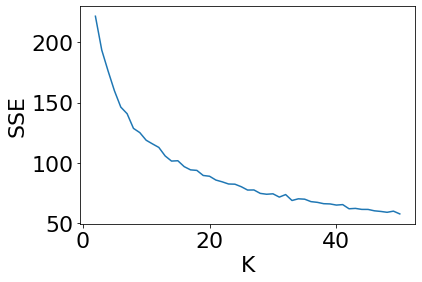

k =  2 SSE =  221.73907602232237 silhouette =  0.25717205337990523

k =  3 SSE =  193.41345906557123 silhouette =  0.18830304263603936

k =  4 SSE =  174.6696363043234 silhouette =  0.18338920015688875

k =  5 SSE =  157.79291154906835 silhouette =  0.1888854273511743

k =  6 SSE =  153.6435037493123 silhouette =  0.16148575949198338

k =  7 SSE =  136.41929145521925 silhouette =  0.1865769832977273

k =  8 SSE =  131.0060511974766 silhouette =  0.171457224715145

k =  9 SSE =  124.55668976885646 silhouette =  0.1633642870357774

k =  10 SSE =  119.43507305000858 silhouette =  0.15079938433240125

k =  11 SSE =  116.97243537638481 silhouette =  0.175545940521999

k =  12 SSE =  110.58720022566769 silhouette =  0.15696633969688661

k =  13 SSE =  106.46938569212949 silhouette =  0.1542113373239187

k =  14 SSE =  101.92888397274888 silhouette =  0.1649192622417284

k =  15 SSE =  99.77834104781127 silhouette =  0.15287048686754898

k =  16 SSE =  99.45790169576829 silhouette =  0.149462

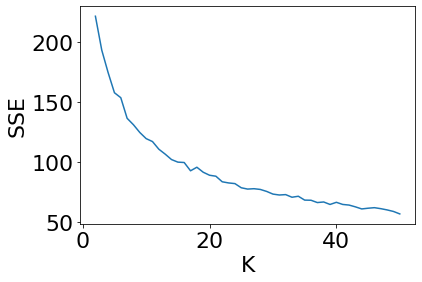

k =  2 SSE =  221.84961150843066 silhouette =  0.2550050149069044

k =  3 SSE =  193.45359083590148 silhouette =  0.18619943014970158

k =  4 SSE =  176.19237716911996 silhouette =  0.18282559709129229

k =  5 SSE =  158.33194838121625 silhouette =  0.1805608475390595

k =  6 SSE =  149.86134983564966 silhouette =  0.1785114293403667

k =  7 SSE =  138.0198873067692 silhouette =  0.1717306935954127

k =  8 SSE =  127.93300897844682 silhouette =  0.173197511137632

k =  9 SSE =  127.28517126157183 silhouette =  0.17624858364212623

k =  10 SSE =  116.25294382568046 silhouette =  0.16359395423892717

k =  11 SSE =  114.80696683569924 silhouette =  0.16468944510446532

k =  12 SSE =  115.34481024441662 silhouette =  0.14688163502361073

k =  13 SSE =  106.50623017934801 silhouette =  0.15393627075225758

k =  14 SSE =  105.99315006847479 silhouette =  0.14317205271667835

k =  15 SSE =  102.13784238542335 silhouette =  0.15574155390661973

k =  16 SSE =  97.77373167409957 silhouette =  0.

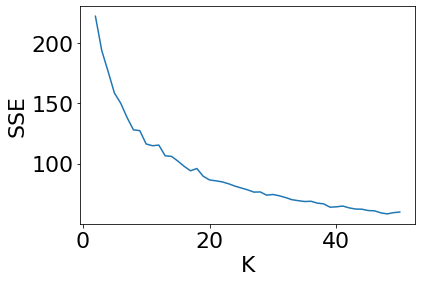

k =  2 SSE =  221.76410932150122 silhouette =  0.2584148543566498

k =  3 SSE =  194.79931447503117 silhouette =  0.17763953645774266

k =  4 SSE =  178.47127368919107 silhouette =  0.1475986793317536

k =  5 SSE =  160.64398693924986 silhouette =  0.1755709027416569

k =  6 SSE =  152.15548287969213 silhouette =  0.16781088302173547

k =  7 SSE =  136.3050683849326 silhouette =  0.17743587134547603

k =  8 SSE =  132.46009282673526 silhouette =  0.17756892641487493

k =  9 SSE =  127.27854655577114 silhouette =  0.14145321514133136

k =  10 SSE =  119.182772358167 silhouette =  0.15379720951428555

k =  11 SSE =  119.17120990007392 silhouette =  0.12850927238530727

k =  12 SSE =  110.38328456933255 silhouette =  0.1725990194613581

k =  13 SSE =  109.10188567821196 silhouette =  0.15380382048523591

k =  14 SSE =  103.27920562896459 silhouette =  0.15718960724505354

k =  15 SSE =  97.82976392487605 silhouette =  0.17115141475838558

k =  16 SSE =  99.49937304509149 silhouette =  0.1

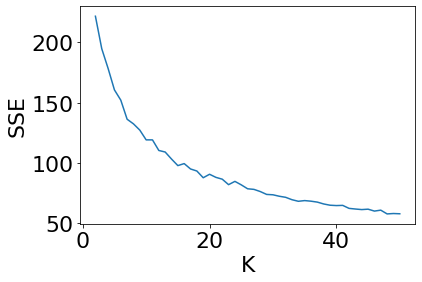

k =  2 SSE =  221.75650723432864 silhouette =  0.2577115109984599

k =  3 SSE =  194.66907567146015 silhouette =  0.18284364107305218

k =  4 SSE =  177.79215832312988 silhouette =  0.17994631206548758

k =  5 SSE =  159.4856098191118 silhouette =  0.18315882053708082

k =  6 SSE =  150.47068184733843 silhouette =  0.17504896304001452

k =  7 SSE =  135.39557341892132 silhouette =  0.17641911725254836

k =  8 SSE =  129.46830846449566 silhouette =  0.18233651418612193

k =  9 SSE =  123.94930622651977 silhouette =  0.1675619192392213

k =  10 SSE =  120.42816066487848 silhouette =  0.16070807083360902

k =  11 SSE =  116.12321978122772 silhouette =  0.15519015510353837

k =  12 SSE =  116.47305894406482 silhouette =  0.14655912884076033

k =  13 SSE =  103.78339977211384 silhouette =  0.1686563251923059

k =  14 SSE =  103.23859620089476 silhouette =  0.1498213437997559

k =  15 SSE =  98.458051392057 silhouette =  0.1627978870754643

k =  16 SSE =  97.44513831195965 silhouette =  0.15

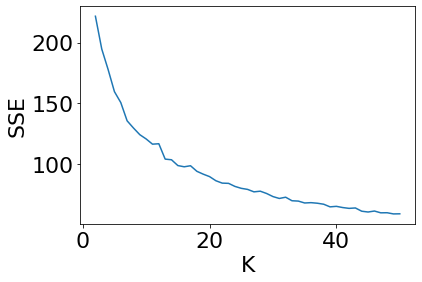

k =  2 SSE =  221.84533427467076 silhouette =  0.2579640034704337

k =  3 SSE =  193.81934231863275 silhouette =  0.19328361818085826

k =  4 SSE =  178.03203341514126 silhouette =  0.1693501729542953

k =  5 SSE =  159.2112722891977 silhouette =  0.17780523467510356

k =  6 SSE =  143.8211157956547 silhouette =  0.18869018259951753

k =  7 SSE =  135.47772094766617 silhouette =  0.19236296958920135

k =  8 SSE =  130.06989455001917 silhouette =  0.16345892312473898

k =  9 SSE =  120.96130142404483 silhouette =  0.1834900224927065

k =  10 SSE =  122.13775227613318 silhouette =  0.14720070859930337

k =  11 SSE =  113.93790487422736 silhouette =  0.16683724633558197

k =  12 SSE =  108.86400555475909 silhouette =  0.15686163275221524

k =  13 SSE =  108.61041912116931 silhouette =  0.14108021905998921

k =  14 SSE =  102.94574047168827 silhouette =  0.15450897725179422

k =  15 SSE =  100.92648037646185 silhouette =  0.1509950783165315

k =  16 SSE =  100.14668884797337 silhouette =  

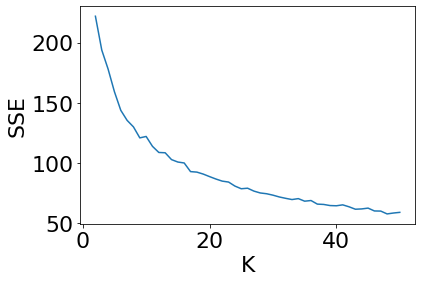

k =  2 SSE =  221.7410025433333 silhouette =  0.25717205337990523

k =  3 SSE =  194.1157189382619 silhouette =  0.19159360206318632

k =  4 SSE =  176.21978759295843 silhouette =  0.17345885327269508

k =  5 SSE =  159.67698147123693 silhouette =  0.18463530948159682

k =  6 SSE =  144.75182154396873 silhouette =  0.18607297329374015

k =  7 SSE =  138.68639935325615 silhouette =  0.18400855646577916

k =  8 SSE =  131.93081101533633 silhouette =  0.15119762710305373

k =  9 SSE =  121.69701294487928 silhouette =  0.18291583343644563

k =  10 SSE =  118.29299968574807 silhouette =  0.16322401007685405

k =  11 SSE =  114.88142315516615 silhouette =  0.16570448946709018

k =  12 SSE =  109.00073813084566 silhouette =  0.15904824500373496

k =  13 SSE =  105.27589109273255 silhouette =  0.16076558316065065

k =  14 SSE =  102.02675374655092 silhouette =  0.1676772986218569

k =  15 SSE =  101.9365587518005 silhouette =  0.14929958891987496

k =  16 SSE =  95.18528007654358 silhouette = 

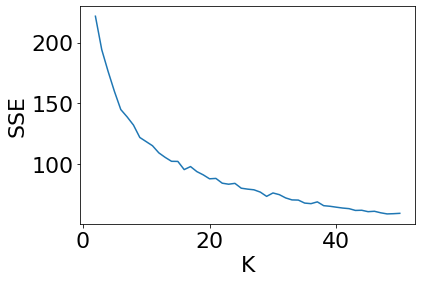

k =  2 SSE =  221.798682469186 silhouette =  0.2550050149069044

k =  3 SSE =  194.0027181639513 silhouette =  0.18698122086737848

k =  4 SSE =  175.6373211572364 silhouette =  0.20060783127794468

k =  5 SSE =  167.71551753411794 silhouette =  0.1510773234855646

k =  6 SSE =  151.1548783370591 silhouette =  0.16957215197447667

k =  7 SSE =  146.8463162124907 silhouette =  0.14624209798944154

k =  8 SSE =  134.44638140406119 silhouette =  0.16408576503571917

k =  9 SSE =  124.54072864199829 silhouette =  0.18424506305632032

k =  10 SSE =  119.48066447195727 silhouette =  0.1727157058951862

k =  11 SSE =  113.13517203994073 silhouette =  0.17218134617092928

k =  12 SSE =  110.70327348031627 silhouette =  0.15075155516320146

k =  13 SSE =  109.15608243854865 silhouette =  0.16550100903576373

k =  14 SSE =  100.72201601085604 silhouette =  0.16377164740505598

k =  15 SSE =  99.74947478551462 silhouette =  0.15575985671375903

k =  16 SSE =  97.89680064158341 silhouette =  0.161

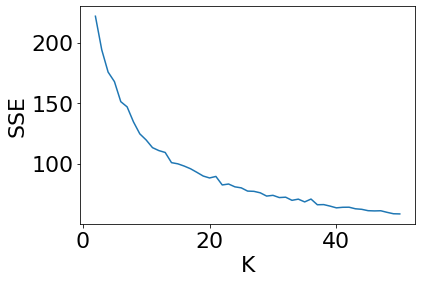

k =  2 SSE =  221.76265102416744 silhouette =  0.25717205337990523

k =  3 SSE =  193.6824963256828 silhouette =  0.1809944722009528

k =  4 SSE =  177.67892807808178 silhouette =  0.1698441644224116

k =  5 SSE =  161.86982246333923 silhouette =  0.17353901381255005

k =  6 SSE =  148.3019254501653 silhouette =  0.18687161140992792

k =  7 SSE =  135.80622545633796 silhouette =  0.177368051644942

k =  8 SSE =  131.03902859405048 silhouette =  0.15578637154773614

k =  9 SSE =  121.12817931840272 silhouette =  0.17866163999335785

k =  10 SSE =  120.98955832421842 silhouette =  0.14425620607302275

k =  11 SSE =  111.96289137939627 silhouette =  0.16926102345850874

k =  12 SSE =  108.2602789035636 silhouette =  0.16459435027336203

k =  13 SSE =  108.46085898854216 silhouette =  0.15048046121827072

k =  14 SSE =  101.45766176045336 silhouette =  0.16328335330679095

k =  15 SSE =  100.10017848454632 silhouette =  0.15991397271941746

k =  16 SSE =  97.44902927482747 silhouette =  0.

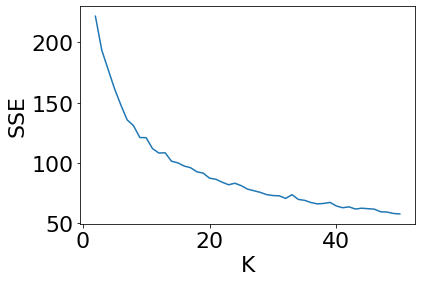

k =  2 SSE =  221.75304062041505 silhouette =  0.2584148543566498

k =  3 SSE =  193.84844399280672 silhouette =  0.18484924022857865

k =  4 SSE =  176.58304854634073 silhouette =  0.183265808194506

k =  5 SSE =  165.29187304002258 silhouette =  0.1734024910906803

k =  6 SSE =  152.54391920389088 silhouette =  0.1759098209960211

k =  7 SSE =  143.29307436768883 silhouette =  0.1628988637547074

k =  8 SSE =  128.0905850323601 silhouette =  0.17248689537639425

k =  9 SSE =  124.62363807659997 silhouette =  0.1655542557802202

k =  10 SSE =  118.26369728860114 silhouette =  0.1684434542027342

k =  11 SSE =  113.8145598795118 silhouette =  0.1618180143317029

k =  12 SSE =  111.95505444191464 silhouette =  0.1542163703763195

k =  13 SSE =  106.4378660157216 silhouette =  0.15901486825745745

k =  14 SSE =  103.44550650769216 silhouette =  0.16305667457006692

k =  15 SSE =  101.55455463302701 silhouette =  0.16970407361569914

k =  16 SSE =  98.22796572314523 silhouette =  0.139211

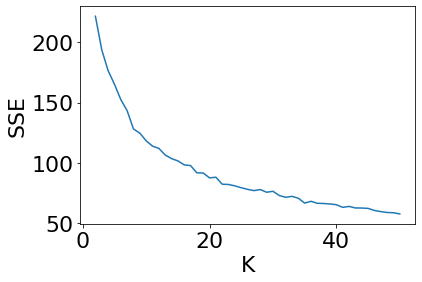

k =  2 SSE =  221.77544902414144 silhouette =  0.2584148543566498

k =  3 SSE =  194.83771442866055 silhouette =  0.1835422490670713

k =  4 SSE =  175.54211978930124 silhouette =  0.1787409767788034

k =  5 SSE =  159.30526116714788 silhouette =  0.18301321466642495

k =  6 SSE =  155.137028656425 silhouette =  0.1450703186753998

k =  7 SSE =  142.3834627391163 silhouette =  0.1733720827303908

k =  8 SSE =  129.4630105306674 silhouette =  0.16981596521837122

k =  9 SSE =  122.297320577786 silhouette =  0.17277709499568247

k =  10 SSE =  116.79106421500914 silhouette =  0.17261988566406491

k =  11 SSE =  115.90712754121438 silhouette =  0.14573980185392105

k =  12 SSE =  107.653376181086 silhouette =  0.1774661951548424

k =  13 SSE =  108.7475671356261 silhouette =  0.15285720603777705

k =  14 SSE =  102.28379954139763 silhouette =  0.1738302713212729

k =  15 SSE =  98.97624375261825 silhouette =  0.15631796836394002

k =  16 SSE =  98.68475508829746 silhouette =  0.1553005982

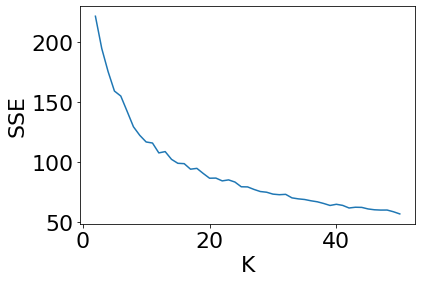

k =  2 SSE =  221.7643179933317 silhouette =  0.25828372966931046

k =  3 SSE =  193.67420796876092 silhouette =  0.17906464828384716

k =  4 SSE =  175.24860641579076 silhouette =  0.1881998583466112

k =  5 SSE =  159.7491964126205 silhouette =  0.17190247098727457

k =  6 SSE =  147.20048364457165 silhouette =  0.1863679191256758

k =  7 SSE =  138.38867521500202 silhouette =  0.16796494382010785

k =  8 SSE =  132.2162227806497 silhouette =  0.1631408034196101

k =  9 SSE =  125.22556102273018 silhouette =  0.16551357289471952

k =  10 SSE =  115.79748043601462 silhouette =  0.16486082444288935

k =  11 SSE =  114.85491921279473 silhouette =  0.15868054656564162

k =  12 SSE =  111.0702957635431 silhouette =  0.16267640479005177

k =  13 SSE =  106.51066500011092 silhouette =  0.15620628085271926

k =  14 SSE =  103.76539896832608 silhouette =  0.1529925952968736

k =  15 SSE =  101.71632796816623 silhouette =  0.14792297125664117

k =  16 SSE =  97.15204254290259 silhouette =  0.1

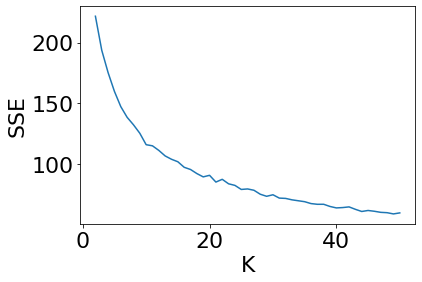

k =  2 SSE =  221.81171566740392 silhouette =  0.2578657109318056

k =  3 SSE =  193.63704214823855 silhouette =  0.18758761060176465

k =  4 SSE =  176.16172476198443 silhouette =  0.17275947443688483

k =  5 SSE =  159.5783538758441 silhouette =  0.1724028445770069

k =  6 SSE =  144.83692634765492 silhouette =  0.1874148707867615

k =  7 SSE =  135.34783235717882 silhouette =  0.1779006417498013

k =  8 SSE =  129.2495889296042 silhouette =  0.17284284564575955

k =  9 SSE =  126.27087285703227 silhouette =  0.13961979037542052

k =  10 SSE =  122.70388364287243 silhouette =  0.14144817276788305

k =  11 SSE =  115.6523445215503 silhouette =  0.14671524082350804

k =  12 SSE =  108.79338768581374 silhouette =  0.1577647132158946

k =  13 SSE =  104.97352254984379 silhouette =  0.17107793055104378

k =  14 SSE =  101.39168465235912 silhouette =  0.1587078669183172

k =  15 SSE =  103.71174203913128 silhouette =  0.14055262744672645

k =  16 SSE =  96.88528938176148 silhouette =  0.16

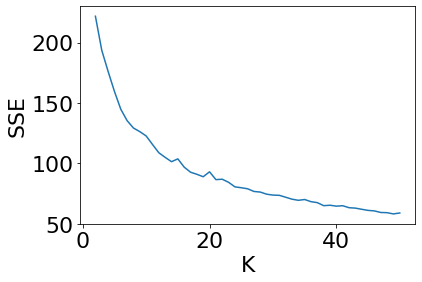

k =  2 SSE =  221.75867550790144 silhouette =  0.25828372966931046

k =  3 SSE =  197.18009178888732 silhouette =  0.24967278975499288

k =  4 SSE =  176.1992618781144 silhouette =  0.1788187215170266

k =  5 SSE =  157.59513520256468 silhouette =  0.180884246870078

k =  6 SSE =  149.2008250241343 silhouette =  0.16094484689511107

k =  7 SSE =  140.6592198851344 silhouette =  0.18408388450308655

k =  8 SSE =  128.39170412587043 silhouette =  0.1698615225396826

k =  9 SSE =  124.48893871152042 silhouette =  0.1718072347517696

k =  10 SSE =  118.45664482451512 silhouette =  0.15637347437941748

k =  11 SSE =  120.78367289803613 silhouette =  0.14817646138919327

k =  12 SSE =  112.82294223068202 silhouette =  0.14938563131942034

k =  13 SSE =  107.17436878689746 silhouette =  0.15449069526593176

k =  14 SSE =  101.90777314124453 silhouette =  0.16048108126135094

k =  15 SSE =  100.00026665367197 silhouette =  0.14563390608704455

k =  16 SSE =  97.11809548585212 silhouette =  0.1

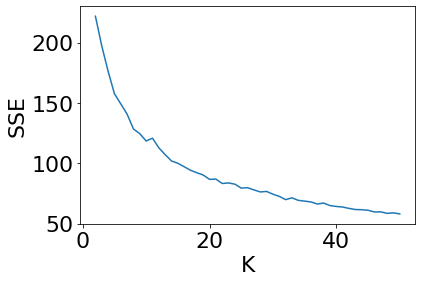

k =  2 SSE =  221.7553793038942 silhouette =  0.2572955826175513

k =  3 SSE =  194.23504913533077 silhouette =  0.17809338320044624

k =  4 SSE =  176.09818388662512 silhouette =  0.17078710896607358

k =  5 SSE =  159.41094651981297 silhouette =  0.18404480814474913

k =  6 SSE =  149.49169058446483 silhouette =  0.17318823178551931

k =  7 SSE =  135.45324771004596 silhouette =  0.18370614904356342

k =  8 SSE =  132.6290543016267 silhouette =  0.1686588751067206

k =  9 SSE =  123.98790863390057 silhouette =  0.17572364574633673

k =  10 SSE =  125.6349368098548 silhouette =  0.16062188359052257

k =  11 SSE =  117.63993118254908 silhouette =  0.14128858058717333

k =  12 SSE =  110.79659270907453 silhouette =  0.14316321089874678

k =  13 SSE =  103.91557482932399 silhouette =  0.1641673430142163

k =  14 SSE =  104.79196853773233 silhouette =  0.15115467059204488

k =  15 SSE =  102.83645076412135 silhouette =  0.14572377084115432

k =  16 SSE =  98.13351500794032 silhouette =  0

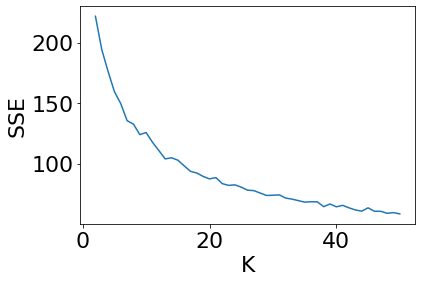

k =  2 SSE =  221.74088350621352 silhouette =  0.2577115109984599

k =  3 SSE =  193.40126692979072 silhouette =  0.18759415848590458

k =  4 SSE =  174.38334460954275 silhouette =  0.18980603495372325

k =  5 SSE =  157.74668275650203 silhouette =  0.18605122523844767

k =  6 SSE =  149.86658694911674 silhouette =  0.17563537186214365

k =  7 SSE =  137.019248365706 silhouette =  0.1724512310297444

k =  8 SSE =  129.97127189778598 silhouette =  0.16809506843363825

k =  9 SSE =  127.87988866558841 silhouette =  0.14564856940384446

k =  10 SSE =  117.11320103438727 silhouette =  0.17403735736769743

k =  11 SSE =  113.25335108796725 silhouette =  0.1590521110129584

k =  12 SSE =  110.40023406582725 silhouette =  0.1488693615840169

k =  13 SSE =  107.98056607615409 silhouette =  0.16246955472918712

k =  14 SSE =  100.7334256244177 silhouette =  0.16446567142117657

k =  15 SSE =  100.56582664911053 silhouette =  0.155198836894171

k =  16 SSE =  96.48192485273304 silhouette =  0.16

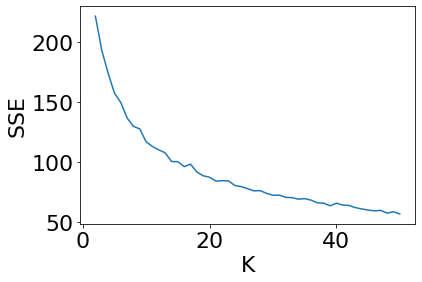

k =  2 SSE =  221.75566289944214 silhouette =  0.2577115109984599

k =  3 SSE =  194.12094234944865 silhouette =  0.19443870210412653

k =  4 SSE =  176.11889354977856 silhouette =  0.18287579080664423

k =  5 SSE =  157.83199680118966 silhouette =  0.18759099328070664

k =  6 SSE =  157.26407991380086 silhouette =  0.14053702004933197

k =  7 SSE =  137.38002633722263 silhouette =  0.1743591757862521

k =  8 SSE =  128.0844861780354 silhouette =  0.1826616762694593

k =  9 SSE =  126.45336979339113 silhouette =  0.17900287329324288

k =  10 SSE =  120.6836160938359 silhouette =  0.15504680834929477

k =  11 SSE =  121.00602168571146 silhouette =  0.14243573319301095

k =  12 SSE =  109.63594395472344 silhouette =  0.1537168187926121

k =  13 SSE =  104.93543300151491 silhouette =  0.17305095372565124

k =  14 SSE =  101.19802461350561 silhouette =  0.15986497973916974

k =  15 SSE =  100.21585512957216 silhouette =  0.15199570784023653

k =  16 SSE =  97.14698479589715 silhouette =  0

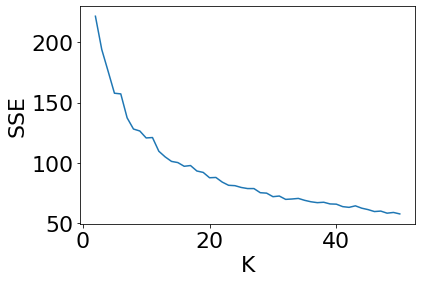

k =  2 SSE =  221.77843374418075 silhouette =  0.2577115109984599

k =  3 SSE =  193.59900188158642 silhouette =  0.1803459202476041

k =  4 SSE =  174.96976002823462 silhouette =  0.1871606181499317

k =  5 SSE =  165.76632392910287 silhouette =  0.16555947880328936

k =  6 SSE =  150.91186463054115 silhouette =  0.15184454908511813

k =  7 SSE =  138.33894243193697 silhouette =  0.17630407394448322

k =  8 SSE =  128.83050313380355 silhouette =  0.16985267380512997

k =  9 SSE =  122.60592398463461 silhouette =  0.15481460201044242

k =  10 SSE =  116.5847666377704 silhouette =  0.17756166841008264

k =  11 SSE =  115.35746748380193 silhouette =  0.1665300159010015

k =  12 SSE =  109.2744385938569 silhouette =  0.17085134382871325

k =  13 SSE =  106.86952318202438 silhouette =  0.15563907422553694

k =  14 SSE =  103.13996121296282 silhouette =  0.16168944882912292

k =  15 SSE =  99.12577225567233 silhouette =  0.15776032083243607

k =  16 SSE =  99.26422337170034 silhouette =  0.

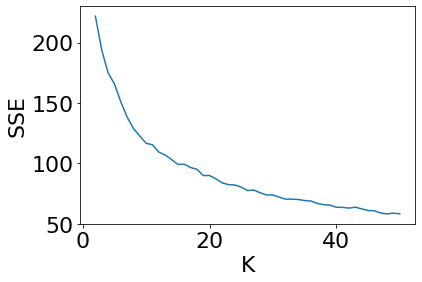

k =  2 SSE =  221.75753084305924 silhouette =  0.2578350650289893

k =  3 SSE =  195.4217148532347 silhouette =  0.1793652276018468

k =  4 SSE =  175.23596453811052 silhouette =  0.17229133198652796

k =  5 SSE =  164.81768413471733 silhouette =  0.1686840408848993

k =  6 SSE =  143.88006351949466 silhouette =  0.1928672466040166

k =  7 SSE =  136.63531439749062 silhouette =  0.17768280262139244

k =  8 SSE =  134.8665510224717 silhouette =  0.162486793497626

k =  9 SSE =  125.01598176074648 silhouette =  0.1885678678042073

k =  10 SSE =  118.57224267099492 silhouette =  0.16759084703536212

k =  11 SSE =  117.74878205051058 silhouette =  0.159101661124614

k =  12 SSE =  111.47356358819788 silhouette =  0.1587515540711328

k =  13 SSE =  108.83796207753086 silhouette =  0.15261521070944215

k =  14 SSE =  102.65272977105391 silhouette =  0.16630685483365262

k =  15 SSE =  100.08634882612216 silhouette =  0.16155070004179317

k =  16 SSE =  95.17863314395883 silhouette =  0.16191

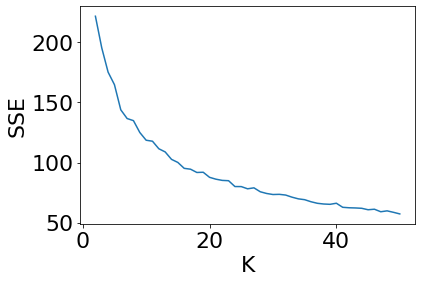

k =  2 SSE =  221.74602239051737 silhouette =  0.2577115109984599

k =  3 SSE =  193.87393553074347 silhouette =  0.18174141550505352

k =  4 SSE =  174.58826317998077 silhouette =  0.1869101336265755

k =  5 SSE =  160.90088285872685 silhouette =  0.18524267014851534

k =  6 SSE =  143.80513530644146 silhouette =  0.19328703948791923

k =  7 SSE =  138.78616565065258 silhouette =  0.18517321014261923

k =  8 SSE =  130.09218523481712 silhouette =  0.17563834800607594

k =  9 SSE =  125.07853560612426 silhouette =  0.16427836498145704

k =  10 SSE =  120.96253710774629 silhouette =  0.1679316943310512

k =  11 SSE =  113.95685685322361 silhouette =  0.1738645876801488

k =  12 SSE =  110.72022545079 silhouette =  0.15472162778210297

k =  13 SSE =  105.10196089444699 silhouette =  0.15820569923504055

k =  14 SSE =  105.16376835666632 silhouette =  0.1530007297593145

k =  15 SSE =  100.92137750774044 silhouette =  0.148347801960772

k =  16 SSE =  98.99376333877684 silhouette =  0.145

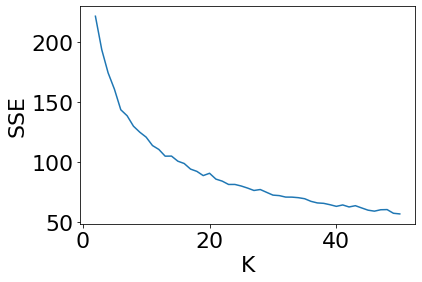

k =  2 SSE =  221.75145969803887 silhouette =  0.2572955826175513

k =  3 SSE =  195.97802695222182 silhouette =  0.2120102744829966

k =  4 SSE =  178.73936814600475 silhouette =  0.16637892387092235

k =  5 SSE =  160.18406493308598 silhouette =  0.19092527815316074

k =  6 SSE =  150.81563998962557 silhouette =  0.18004931588589856

k =  7 SSE =  137.31087166508453 silhouette =  0.17847575351145437

k =  8 SSE =  128.4750818786307 silhouette =  0.16658335325247056

k =  9 SSE =  129.2535053990623 silhouette =  0.1479507647875152

k =  10 SSE =  119.45514533664823 silhouette =  0.15046908749111812

k =  11 SSE =  113.78098891586372 silhouette =  0.17530810937427516

k =  12 SSE =  110.02816429984702 silhouette =  0.15951234610589252

k =  13 SSE =  105.33194033952971 silhouette =  0.153884521791139

k =  14 SSE =  104.88184729977405 silhouette =  0.156149411947096

k =  15 SSE =  100.32684027618443 silhouette =  0.14809855862700677

k =  16 SSE =  97.76419219200787 silhouette =  0.16

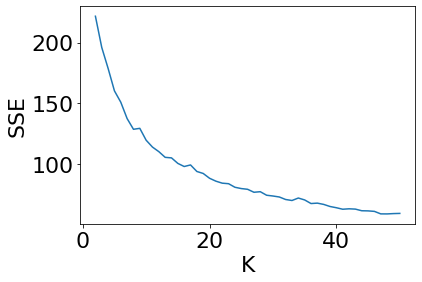

k =  2 SSE =  221.75362218509264 silhouette =  0.25828372966931046

k =  3 SSE =  195.23246689078238 silhouette =  0.18123242078971205

k =  4 SSE =  178.45673976808126 silhouette =  0.17911405780961337

k =  5 SSE =  157.80142773311562 silhouette =  0.1796768496861339

k =  6 SSE =  143.9763097552315 silhouette =  0.1890970304357569

k =  7 SSE =  141.47258023391097 silhouette =  0.16022415829612233

k =  8 SSE =  130.4525987920931 silhouette =  0.179028477113358

k =  9 SSE =  125.53299602952433 silhouette =  0.18236220797572433

k =  10 SSE =  120.88222886907569 silhouette =  0.1554630811580819

k =  11 SSE =  114.6254278389916 silhouette =  0.17182551445108693

k =  12 SSE =  108.92101422241281 silhouette =  0.1638142429375991

k =  13 SSE =  104.38116463226365 silhouette =  0.15949935295831727

k =  14 SSE =  102.75509367350014 silhouette =  0.15813043975144778

k =  15 SSE =  99.47849416115068 silhouette =  0.1585581577981237

k =  16 SSE =  97.80317108791253 silhouette =  0.1633

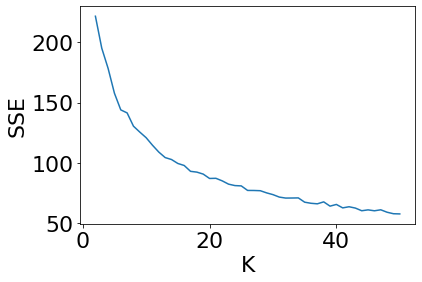

k =  2 SSE =  221.94982615406767 silhouette =  0.2519351367843805

k =  3 SSE =  200.8480873265242 silhouette =  0.1377830800869043

k =  4 SSE =  176.09513300714192 silhouette =  0.1746735389841135

k =  5 SSE =  160.0782206705129 silhouette =  0.1767761993404783

k =  6 SSE =  144.64945196659832 silhouette =  0.17732137967713357

k =  7 SSE =  137.18980105894818 silhouette =  0.17314549531239082

k =  8 SSE =  132.68152804620595 silhouette =  0.17285225439929758

k =  9 SSE =  121.96469550630833 silhouette =  0.18832466757617955

k =  10 SSE =  120.9080485306168 silhouette =  0.16324707992266918

k =  11 SSE =  117.50179360427273 silhouette =  0.14951274787347404

k =  12 SSE =  109.77205660129081 silhouette =  0.15525273194166392

k =  13 SSE =  105.8528070125613 silhouette =  0.16275740661649316

k =  14 SSE =  104.16051690581409 silhouette =  0.1574882093657909

k =  15 SSE =  103.39955061464391 silhouette =  0.14470694728458056

k =  16 SSE =  98.37402290643666 silhouette =  0.15

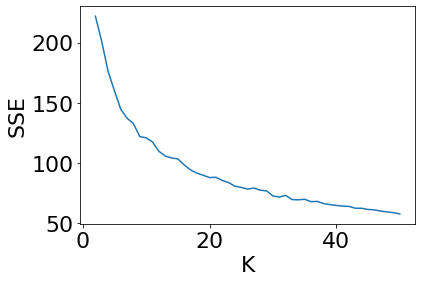

k =  2 SSE =  221.75084448654673 silhouette =  0.25717205337990523

k =  3 SSE =  194.56328469594285 silhouette =  0.1854719099543027

k =  4 SSE =  175.87143951635068 silhouette =  0.19156613755925614

k =  5 SSE =  164.86132217094413 silhouette =  0.1687554837410747

k =  6 SSE =  148.32797107061495 silhouette =  0.18262373481203356

k =  7 SSE =  136.6454403435749 silhouette =  0.18220085718377063

k =  8 SSE =  132.17927774793495 silhouette =  0.16647729408462753

k =  9 SSE =  123.66745769215525 silhouette =  0.1792723195199474

k =  10 SSE =  121.88856770314993 silhouette =  0.14954169492530686

k =  11 SSE =  116.22251177119907 silhouette =  0.15213087856981442

k =  12 SSE =  111.07101422799927 silhouette =  0.15168938542383334

k =  13 SSE =  111.00059631448065 silhouette =  0.14156225619113205

k =  14 SSE =  104.61754293232413 silhouette =  0.1494704288763032

k =  15 SSE =  98.84227923523771 silhouette =  0.15799827428697466

k =  16 SSE =  96.07967888775256 silhouette =  0

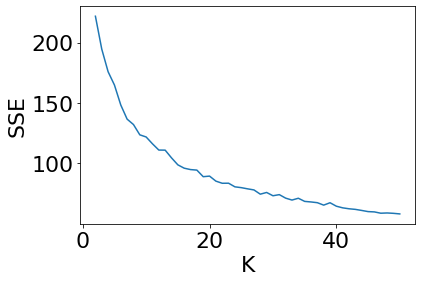

k =  2 SSE =  221.83446760243828 silhouette =  0.2568390118687884

k =  3 SSE =  193.56540705049449 silhouette =  0.18082099950602806

k =  4 SSE =  175.9084625446317 silhouette =  0.1782438398697068

k =  5 SSE =  161.35118867830096 silhouette =  0.17854055795442322

k =  6 SSE =  145.0328201191479 silhouette =  0.18861725860212838

k =  7 SSE =  138.98885128305454 silhouette =  0.1760241186977293

k =  8 SSE =  128.8515433689479 silhouette =  0.18741135939000447

k =  9 SSE =  126.86752704513323 silhouette =  0.15595051372455354

k =  10 SSE =  117.31517126057969 silhouette =  0.16286146084664424

k =  11 SSE =  117.73984481159196 silhouette =  0.14014939860145767

k =  12 SSE =  110.27837491435696 silhouette =  0.14970195152445354

k =  13 SSE =  107.73886651234682 silhouette =  0.1520161988752255

k =  14 SSE =  103.79434114959297 silhouette =  0.16231264518990215

k =  15 SSE =  99.1596028025422 silhouette =  0.16226466958770716

k =  16 SSE =  96.97873267967802 silhouette =  0.15

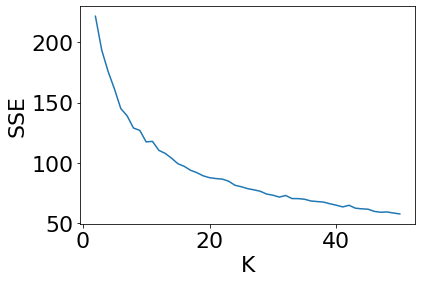

k =  2 SSE =  221.88644173360305 silhouette =  0.2529432601595144

k =  3 SSE =  193.66090206882708 silhouette =  0.19108531168663018

k =  4 SSE =  175.56068245679447 silhouette =  0.18419248882484604

k =  5 SSE =  161.35430280331374 silhouette =  0.17973202713107506

k =  6 SSE =  152.85340645012485 silhouette =  0.17007694160946046

k =  7 SSE =  140.1780981160764 silhouette =  0.1743934812527473

k =  8 SSE =  133.17234396354493 silhouette =  0.1684021485038552

k =  9 SSE =  125.74194888768622 silhouette =  0.17972753837337022

k =  10 SSE =  118.58406352205549 silhouette =  0.16821279599381259

k =  11 SSE =  115.07366603824859 silhouette =  0.17247820297361907

k =  12 SSE =  114.99534013566634 silhouette =  0.12566383084812344

k =  13 SSE =  107.00003400440384 silhouette =  0.16833877860749255

k =  14 SSE =  101.70192561362967 silhouette =  0.15599960735754792

k =  15 SSE =  101.03547245907544 silhouette =  0.16477128444124273

k =  16 SSE =  99.35788300129474 silhouette = 

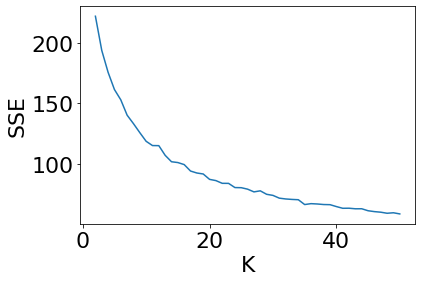

k =  2 SSE =  222.17209029028854 silhouette =  0.2545009746332859

k =  3 SSE =  194.66421672992237 silhouette =  0.18790692737602496

k =  4 SSE =  178.42615059448738 silhouette =  0.2154488036217221

k =  5 SSE =  159.8655122708178 silhouette =  0.17169603914358297

k =  6 SSE =  150.91963866436046 silhouette =  0.16520237104701935

k =  7 SSE =  140.25493344440224 silhouette =  0.16839193790097787

k =  8 SSE =  130.80513534735644 silhouette =  0.1721005949451265

k =  9 SSE =  120.9682438266448 silhouette =  0.18149161026264685

k =  10 SSE =  120.75890963310273 silhouette =  0.1579473411641137

k =  11 SSE =  116.33050516058454 silhouette =  0.15141801464297422

k =  12 SSE =  109.15180918431116 silhouette =  0.17285924495668442

k =  13 SSE =  108.77349008062167 silhouette =  0.15623872166921077

k =  14 SSE =  103.53823773646673 silhouette =  0.16844386238023173

k =  15 SSE =  99.52788794969258 silhouette =  0.16444634361038774

k =  16 SSE =  99.41972822564306 silhouette =  0.

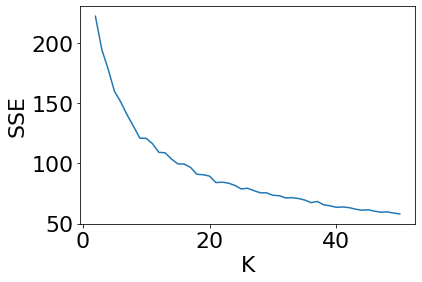

k =  2 SSE =  221.76146489536424 silhouette =  0.25717205337990523

k =  3 SSE =  193.65349832853735 silhouette =  0.19017910467059324

k =  4 SSE =  176.84494392317168 silhouette =  0.1859735595884266

k =  5 SSE =  160.59156655529378 silhouette =  0.16510604518490704

k =  6 SSE =  145.3852587350443 silhouette =  0.18191747758635085

k =  7 SSE =  138.0968076020909 silhouette =  0.15219573562793534

k =  8 SSE =  132.78284122321173 silhouette =  0.14942772025434325

k =  9 SSE =  126.30987182365963 silhouette =  0.14628634549741723

k =  10 SSE =  119.16835959841558 silhouette =  0.17061691853934172

k =  11 SSE =  116.69397669275978 silhouette =  0.17689960473914068

k =  12 SSE =  109.47493755965634 silhouette =  0.16913867572859398

k =  13 SSE =  106.18008624090707 silhouette =  0.1576126023043919

k =  14 SSE =  103.90443080992213 silhouette =  0.15138425775504066

k =  15 SSE =  102.723142179629 silhouette =  0.14545040531271036

k =  16 SSE =  96.92183624640244 silhouette =  0

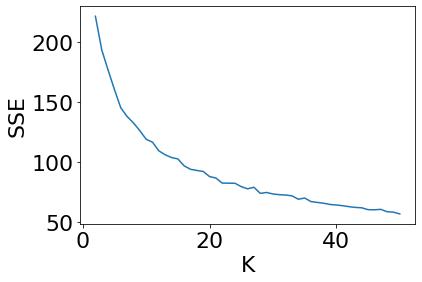

k =  2 SSE =  221.738708964635 silhouette =  0.2577115109984599

k =  3 SSE =  194.48580229558215 silhouette =  0.18506592202458552

k =  4 SSE =  175.86705958355876 silhouette =  0.1748060590302517

k =  5 SSE =  159.8085529291955 silhouette =  0.16892719038390666

k =  6 SSE =  152.09576881756863 silhouette =  0.17999936745810888

k =  7 SSE =  139.2767956801499 silhouette =  0.1508888248356968

k =  8 SSE =  133.36967697707902 silhouette =  0.15826722321723383

k =  9 SSE =  123.11174716954184 silhouette =  0.1719896947812357

k =  10 SSE =  121.5034457392617 silhouette =  0.14226135550344443

k =  11 SSE =  114.7127762754714 silhouette =  0.16555796484785065

k =  12 SSE =  114.96052074467468 silhouette =  0.13605938040707433

k =  13 SSE =  106.45096340598042 silhouette =  0.14720398121323086

k =  14 SSE =  103.588488179337 silhouette =  0.15808425217932495

k =  15 SSE =  102.17018331197247 silhouette =  0.15546697709885496

k =  16 SSE =  98.12795632237736 silhouette =  0.15175

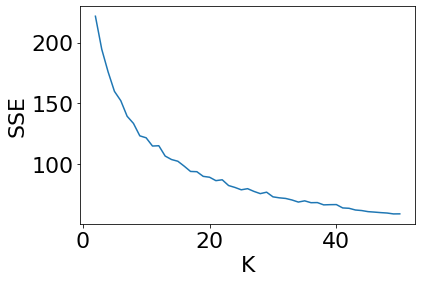

k =  2 SSE =  221.8155591855652 silhouette =  0.25717205337990523

k =  3 SSE =  195.55941286865718 silhouette =  0.18727875138882852

k =  4 SSE =  180.02818624891339 silhouette =  0.1987505054137801

k =  5 SSE =  162.4331697600658 silhouette =  0.1927206678886069

k =  6 SSE =  143.75238916814303 silhouette =  0.19382801965168658

k =  7 SSE =  138.85000989188677 silhouette =  0.17464450201482432

k =  8 SSE =  128.30093907336646 silhouette =  0.17615698801376076

k =  9 SSE =  124.8874088571256 silhouette =  0.1703342847867133

k =  10 SSE =  117.45609474719919 silhouette =  0.1684767826239586

k =  11 SSE =  113.51470116022573 silhouette =  0.15880199762798566

k =  12 SSE =  110.16786900397373 silhouette =  0.1555639026338902

k =  13 SSE =  104.18324147946035 silhouette =  0.1614121986523577

k =  14 SSE =  101.52333311434379 silhouette =  0.16468674986536938

k =  15 SSE =  100.16334782003116 silhouette =  0.15914340144010175

k =  16 SSE =  101.4270723762514 silhouette =  0.15

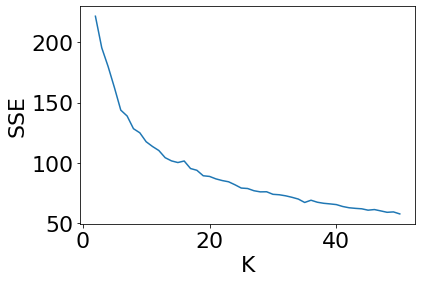

k =  2 SSE =  221.7518369109188 silhouette =  0.2577115109984599

k =  3 SSE =  193.7180019254763 silhouette =  0.17898539112195896

k =  4 SSE =  187.35043646339156 silhouette =  0.19797862072859926

k =  5 SSE =  166.4617100850919 silhouette =  0.15381745333483401

k =  6 SSE =  151.46585312049808 silhouette =  0.17249172145552136

k =  7 SSE =  136.28134003608352 silhouette =  0.1790910882404476

k =  8 SSE =  134.46621101482214 silhouette =  0.1687332249135749

k =  9 SSE =  125.50056598708339 silhouette =  0.1500214290078215

k =  10 SSE =  117.06392042455715 silhouette =  0.15480091853343536

k =  11 SSE =  121.54326056506672 silhouette =  0.1513256761357813

k =  12 SSE =  108.28655721423922 silhouette =  0.16461775485566907

k =  13 SSE =  107.5892054807447 silhouette =  0.15478351837295762

k =  14 SSE =  105.70460443560667 silhouette =  0.1472417065822181

k =  15 SSE =  102.42364121994086 silhouette =  0.1637997632492638

k =  16 SSE =  97.2512572949821 silhouette =  0.15865

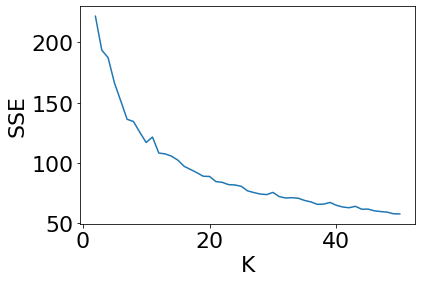

k =  2 SSE =  221.74813677986882 silhouette =  0.2578350650289893

k =  3 SSE =  197.1918496975436 silhouette =  0.2114943207984105

k =  4 SSE =  175.48290963450108 silhouette =  0.1738092373726115

k =  5 SSE =  159.65247687397337 silhouette =  0.19311561459731774

k =  6 SSE =  150.0222988525749 silhouette =  0.1768766704407468

k =  7 SSE =  137.04764783762593 silhouette =  0.1798713439551519

k =  8 SSE =  133.34164375174902 silhouette =  0.17210366989060205

k =  9 SSE =  123.79791527600293 silhouette =  0.14789025074391315

k =  10 SSE =  117.99004319088603 silhouette =  0.17778954183528903

k =  11 SSE =  117.11665734814454 silhouette =  0.14886741934191697

k =  12 SSE =  108.57486035992561 silhouette =  0.15896354341917035

k =  13 SSE =  106.8673519831614 silhouette =  0.17264387617633675

k =  14 SSE =  106.27575372143684 silhouette =  0.15609194758082737

k =  15 SSE =  97.01273863740313 silhouette =  0.1664176029987707

k =  16 SSE =  97.17635283920606 silhouette =  0.156

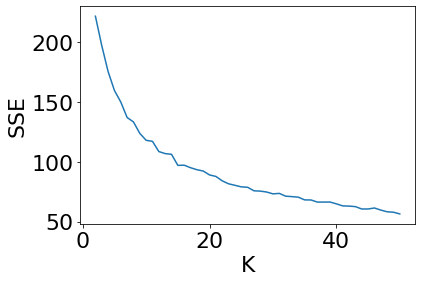

k =  2 SSE =  221.73832420622438 silhouette =  0.2577115109984599

k =  3 SSE =  198.0432585799673 silhouette =  0.17628055969890233

k =  4 SSE =  178.82266262568362 silhouette =  0.15569230985032853

k =  5 SSE =  161.02927654906293 silhouette =  0.1610979753535614

k =  6 SSE =  144.81489440881774 silhouette =  0.19531780169135537

k =  7 SSE =  137.36795320169665 silhouette =  0.174847505950368

k =  8 SSE =  133.4319434320785 silhouette =  0.1517970419374974

k =  9 SSE =  123.58120100252924 silhouette =  0.18057488570511915

k =  10 SSE =  119.61854813125954 silhouette =  0.1555528718050041

k =  11 SSE =  115.45595647463799 silhouette =  0.14633951373291645

k =  12 SSE =  108.29494844690927 silhouette =  0.18175798148741235

k =  13 SSE =  105.94544689521133 silhouette =  0.16004134367605896

k =  14 SSE =  102.05293237800818 silhouette =  0.16347265967404093

k =  15 SSE =  101.62017390149741 silhouette =  0.15540140732751384

k =  16 SSE =  97.95551775524468 silhouette =  0.1

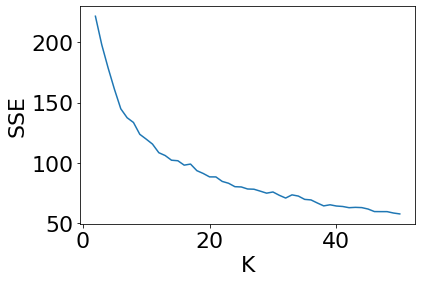

k =  2 SSE =  221.78251969038985 silhouette =  0.25717205337990523

k =  3 SSE =  194.19676142738126 silhouette =  0.18524848559973817

k =  4 SSE =  174.8624992339062 silhouette =  0.1774617792149343

k =  5 SSE =  164.12598029315836 silhouette =  0.1558909807260865

k =  6 SSE =  144.06435646534308 silhouette =  0.18059615368285944

k =  7 SSE =  140.33868230308448 silhouette =  0.17636843046201872

k =  8 SSE =  135.8829653232594 silhouette =  0.16262735383554117

k =  9 SSE =  122.99014947363608 silhouette =  0.15605575580173728

k =  10 SSE =  120.20385600357022 silhouette =  0.15891602481051836

k =  11 SSE =  112.86064376117378 silhouette =  0.1601636785586491

k =  12 SSE =  111.84074520577724 silhouette =  0.15139203172334134

k =  13 SSE =  105.00595370785845 silhouette =  0.17240579464236447

k =  14 SSE =  101.85940013516182 silhouette =  0.16220669137247878

k =  15 SSE =  100.5311204440316 silhouette =  0.15275897500186564

k =  16 SSE =  98.61697455385647 silhouette =  0

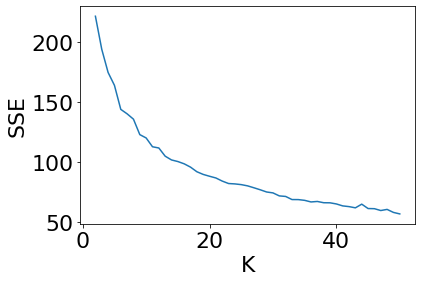

k =  2 SSE =  221.78980484377084 silhouette =  0.2559067598394933

k =  3 SSE =  195.57947022553364 silhouette =  0.18536934622395407

k =  4 SSE =  175.49898641959695 silhouette =  0.17337233435829866

k =  5 SSE =  157.6238428250298 silhouette =  0.1901479560635784

k =  6 SSE =  144.3486557073092 silhouette =  0.1913266261035563

k =  7 SSE =  144.1300690147668 silhouette =  0.1728561521337246

k =  8 SSE =  128.55938392343538 silhouette =  0.18887700915302727

k =  9 SSE =  123.69790821242721 silhouette =  0.15532734209743534

k =  10 SSE =  117.20687500129839 silhouette =  0.17137229998563255

k =  11 SSE =  113.89067933589945 silhouette =  0.16673689777812717

k =  12 SSE =  111.46615525838676 silhouette =  0.15342696226485694

k =  13 SSE =  107.02140466927369 silhouette =  0.1509255143523414

k =  14 SSE =  103.92703306866227 silhouette =  0.15532334548261031

k =  15 SSE =  101.79546873690387 silhouette =  0.16136718947712797

k =  16 SSE =  98.69482871614764 silhouette =  0.1

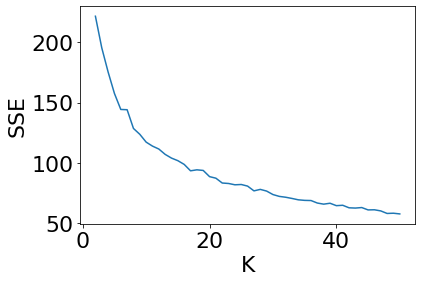

k =  2 SSE =  221.77193992867552 silhouette =  0.25717205337990523

k =  3 SSE =  194.04032761380844 silhouette =  0.17168850320719492

k =  4 SSE =  174.71469582192782 silhouette =  0.17894102176512203

k =  5 SSE =  160.44950682472157 silhouette =  0.17091249985151366

k =  6 SSE =  146.54350172821424 silhouette =  0.17895313220338016

k =  7 SSE =  143.4325436361227 silhouette =  0.17138488853740705

k =  8 SSE =  129.85692142050192 silhouette =  0.17972720394152186

k =  9 SSE =  126.4236908198174 silhouette =  0.14911904425172623

k =  10 SSE =  118.03634574572601 silhouette =  0.16968612007822267

k =  11 SSE =  112.92632356951911 silhouette =  0.17033094053485262

k =  12 SSE =  109.29261948856876 silhouette =  0.15843874134886676

k =  13 SSE =  107.96566250620711 silhouette =  0.15409699119992354

k =  14 SSE =  103.85387755188995 silhouette =  0.1538340604978796

k =  15 SSE =  101.05436110446752 silhouette =  0.15070468850484917

k =  16 SSE =  96.64773034983445 silhouette =

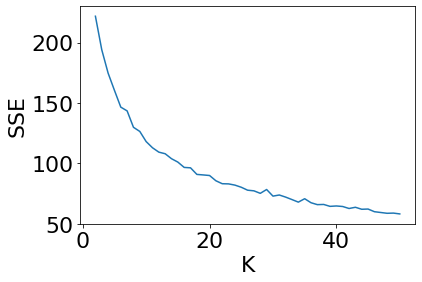

k =  2 SSE =  221.76872474657725 silhouette =  0.2584148543566498

k =  3 SSE =  197.27971095644247 silhouette =  0.24515400158444897

k =  4 SSE =  175.3220194889663 silhouette =  0.17572912195072332

k =  5 SSE =  159.51991087822958 silhouette =  0.177932322926669

k =  6 SSE =  153.69487454976024 silhouette =  0.16161267693797787

k =  7 SSE =  138.05489417662793 silhouette =  0.1811509359123152

k =  8 SSE =  128.80164429380255 silhouette =  0.18033258835633775

k =  9 SSE =  124.06845769182688 silhouette =  0.14598052698195962

k =  10 SSE =  119.17960825757004 silhouette =  0.1588672569442608

k =  11 SSE =  114.01927966226967 silhouette =  0.15896314953371649

k =  12 SSE =  114.59456855323555 silhouette =  0.14523629638318733

k =  13 SSE =  107.58148568467645 silhouette =  0.15575703670525815

k =  14 SSE =  101.83978109141033 silhouette =  0.15943870996723983

k =  15 SSE =  99.10468963751732 silhouette =  0.16820342879299913

k =  16 SSE =  96.80234704926295 silhouette =  0.

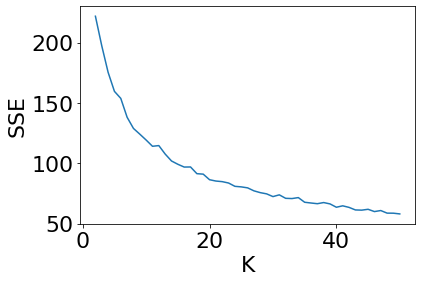

k =  2 SSE =  221.76316974982092 silhouette =  0.25717205337990523

k =  3 SSE =  193.8736030635925 silhouette =  0.1923095600024001

k =  4 SSE =  176.50690297995968 silhouette =  0.17259892076280473

k =  5 SSE =  166.02646914899367 silhouette =  0.16060825745811483

k =  6 SSE =  147.67921641589703 silhouette =  0.17711014647667195

k =  7 SSE =  145.5177484656049 silhouette =  0.14333250124319677

k =  8 SSE =  136.8296532534743 silhouette =  0.16467931515498418

k =  9 SSE =  121.87681003845782 silhouette =  0.18918826821548346

k =  10 SSE =  119.6106337454788 silhouette =  0.16592291042893448

k =  11 SSE =  112.48323794643055 silhouette =  0.16187663724638032

k =  12 SSE =  111.85853888114985 silhouette =  0.14532295196523032

k =  13 SSE =  105.83062358630056 silhouette =  0.15604166849906467

k =  14 SSE =  101.28659524682823 silhouette =  0.16239416117111105

k =  15 SSE =  99.79206627089506 silhouette =  0.15554273245873704

k =  16 SSE =  95.98695108050946 silhouette =  0

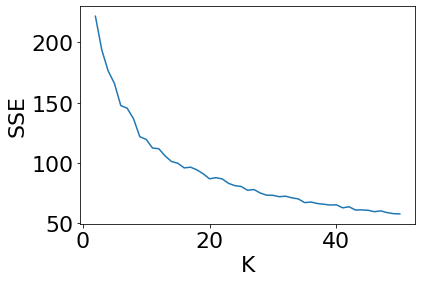

k =  2 SSE =  221.7627419312194 silhouette =  0.2584148543566498

k =  3 SSE =  194.77683694493575 silhouette =  0.17702151309871753

k =  4 SSE =  178.55093425889177 silhouette =  0.16380718946554307

k =  5 SSE =  158.91290256451134 silhouette =  0.17749636676082822

k =  6 SSE =  149.42544535208094 silhouette =  0.184797342182208

k =  7 SSE =  137.00137146819878 silhouette =  0.18460458809971225

k =  8 SSE =  132.47410902013013 silhouette =  0.1605528946393257

k =  9 SSE =  126.057970821924 silhouette =  0.1724235000572469

k =  10 SSE =  121.38595262887466 silhouette =  0.15379497950545887

k =  11 SSE =  111.48035904819062 silhouette =  0.1692729860499313

k =  12 SSE =  113.55748085561403 silhouette =  0.15850738779049534

k =  13 SSE =  109.20320037463314 silhouette =  0.1495339331194625

k =  14 SSE =  107.19732947081792 silhouette =  0.14433974047505818

k =  15 SSE =  98.75847572199973 silhouette =  0.16897566918101556

k =  16 SSE =  96.5802068878701 silhouette =  0.16831

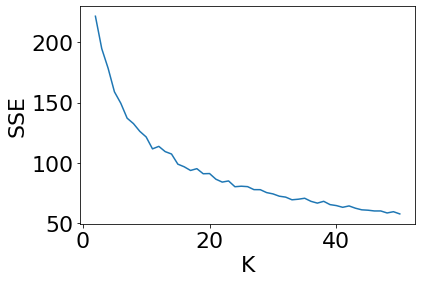

k =  2 SSE =  221.74797758676974 silhouette =  0.2584148543566498

k =  3 SSE =  197.58023134218624 silhouette =  0.1654591713485576

k =  4 SSE =  177.1798820303692 silhouette =  0.18394944233342464

k =  5 SSE =  164.583172392392 silhouette =  0.1576689270757922

k =  6 SSE =  143.6802949016731 silhouette =  0.19062060314029497

k =  7 SSE =  136.52725435928951 silhouette =  0.18085198256051654

k =  8 SSE =  132.4607278759131 silhouette =  0.17940807979897846

k =  9 SSE =  125.06533976527336 silhouette =  0.1585874288533005

k =  10 SSE =  119.1780152952799 silhouette =  0.18480072105102882

k =  11 SSE =  116.55328375462209 silhouette =  0.15392966877689243

k =  12 SSE =  111.86669321892352 silhouette =  0.16083075274409167

k =  13 SSE =  104.2625594922629 silhouette =  0.15733789666271888

k =  14 SSE =  104.65138726195731 silhouette =  0.14513075195830646

k =  15 SSE =  98.60375535670057 silhouette =  0.16164378002010438

k =  16 SSE =  100.13139572852273 silhouette =  0.1457

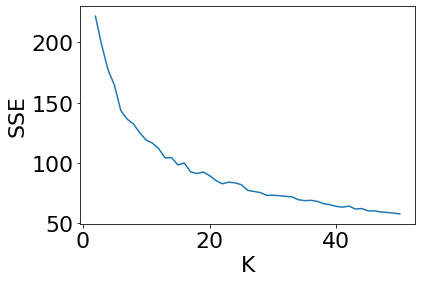

k =  2 SSE =  221.80224054449172 silhouette =  0.2572955826175513

k =  3 SSE =  194.27361757955063 silhouette =  0.17862480718349938

k =  4 SSE =  182.11338553525155 silhouette =  0.17013983536979163

k =  5 SSE =  159.12579627893817 silhouette =  0.18495730623513745

k =  6 SSE =  156.886418133808 silhouette =  0.15165869612901867

k =  7 SSE =  137.00123444988213 silhouette =  0.17633922351764325

k =  8 SSE =  135.44428532132446 silhouette =  0.171571528541803

k =  9 SSE =  122.4945791344499 silhouette =  0.17320065438545054

k =  10 SSE =  117.91751528296587 silhouette =  0.17177676135958983

k =  11 SSE =  112.86004638113891 silhouette =  0.15857589502967265

k =  12 SSE =  111.31157281749219 silhouette =  0.15855293337458393

k =  13 SSE =  107.82126421273551 silhouette =  0.16114649097851536

k =  14 SSE =  103.73698820276208 silhouette =  0.15163519567782643

k =  15 SSE =  98.78624909328217 silhouette =  0.16171200625203058

k =  16 SSE =  97.91352369210071 silhouette =  0.

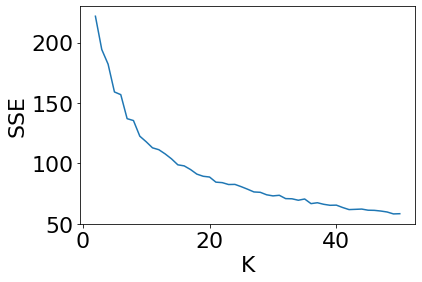

k =  2 SSE =  221.79551895570913 silhouette =  0.255821815884584

k =  3 SSE =  199.40491557177415 silhouette =  0.14346706246364982

k =  4 SSE =  175.21560846168416 silhouette =  0.19031683045751677

k =  5 SSE =  158.55611630953373 silhouette =  0.1855246077734447

k =  6 SSE =  145.1265953300075 silhouette =  0.18771561430260061

k =  7 SSE =  140.8104882419642 silhouette =  0.18127101535176934

k =  8 SSE =  130.72387588360465 silhouette =  0.1800654000712114

k =  9 SSE =  124.53529362315355 silhouette =  0.1667220193575852

k =  10 SSE =  116.92246079008503 silhouette =  0.17913421080607056

k =  11 SSE =  114.69078484218628 silhouette =  0.1497734333868099

k =  12 SSE =  109.37284068173034 silhouette =  0.1616318853981066

k =  13 SSE =  108.35732460230497 silhouette =  0.15722157714275564

k =  14 SSE =  104.58032670218759 silhouette =  0.16018804133169035

k =  15 SSE =  103.25291558813518 silhouette =  0.1414489094417721

k =  16 SSE =  100.28132563856707 silhouette =  0.14

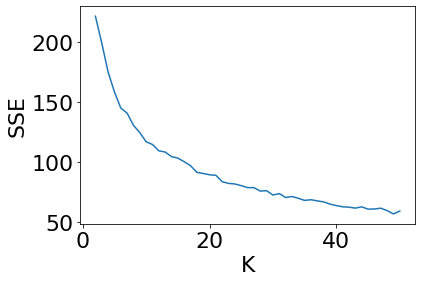

k =  2 SSE =  221.79732083719645 silhouette =  0.2577115109984599

k =  3 SSE =  194.8128854590102 silhouette =  0.1945809586596618

k =  4 SSE =  175.89329095580854 silhouette =  0.16821782748909425

k =  5 SSE =  158.44559630103606 silhouette =  0.185301400955573

k =  6 SSE =  149.93115968738104 silhouette =  0.17121055006973454

k =  7 SSE =  136.09531073907073 silhouette =  0.18788731809056955

k =  8 SSE =  130.21351697255236 silhouette =  0.1818554334933412

k =  9 SSE =  126.97381780913 silhouette =  0.1513743547523533

k =  10 SSE =  118.19156998128004 silhouette =  0.15577646961418862

k =  11 SSE =  113.05403095300468 silhouette =  0.17773520771098514

k =  12 SSE =  109.26822298923992 silhouette =  0.15359994446605135

k =  13 SSE =  106.50956508903938 silhouette =  0.17331359273760275

k =  14 SSE =  101.88569998503392 silhouette =  0.1640616360158499

k =  15 SSE =  97.84482137805453 silhouette =  0.16845354430725193

k =  16 SSE =  96.49401719470863 silhouette =  0.16079

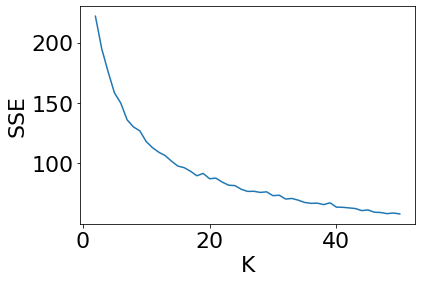

k =  2 SSE =  221.78936540189932 silhouette =  0.2572955826175513

k =  3 SSE =  193.35659210927435 silhouette =  0.18533872570663196

k =  4 SSE =  176.1337174209451 silhouette =  0.190865462820211

k =  5 SSE =  160.85124647592946 silhouette =  0.16530665834263683

k =  6 SSE =  150.30120603704256 silhouette =  0.17854777761086515

k =  7 SSE =  135.0033091558929 silhouette =  0.18874781218078726

k =  8 SSE =  131.1721622983721 silhouette =  0.1474628762139338

k =  9 SSE =  122.03076502715827 silhouette =  0.18722584657544897

k =  10 SSE =  122.06457814779206 silhouette =  0.1760624908113185

k =  11 SSE =  114.43317258732736 silhouette =  0.164820955587564

k =  12 SSE =  107.70092972064741 silhouette =  0.16363756388272627

k =  13 SSE =  107.02646259828487 silhouette =  0.16246087255072253

k =  14 SSE =  103.45149314039557 silhouette =  0.16031906563569434

k =  15 SSE =  102.14736273306556 silhouette =  0.16128114066459034

k =  16 SSE =  98.97375719587632 silhouette =  0.149

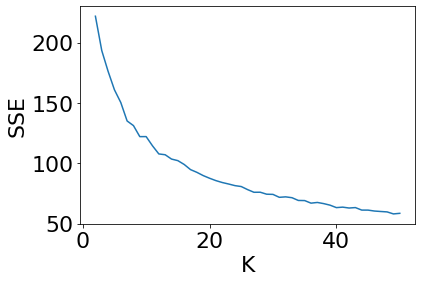

k =  2 SSE =  221.74600791951863 silhouette =  0.2577115109984599

k =  3 SSE =  194.49819672173726 silhouette =  0.17937272068514595

k =  4 SSE =  175.51973735413003 silhouette =  0.17481910320889862

k =  5 SSE =  160.83799667809825 silhouette =  0.19449952114670144

k =  6 SSE =  150.83807224572598 silhouette =  0.16996684851061944

k =  7 SSE =  137.42596592850504 silhouette =  0.18518890460921947

k =  8 SSE =  127.52226265527825 silhouette =  0.18157777809564393

k =  9 SSE =  129.5544952230986 silhouette =  0.15240748523913816

k =  10 SSE =  122.451208329701 silhouette =  0.14776480469170813

k =  11 SSE =  113.89288030696109 silhouette =  0.1608666209568422

k =  12 SSE =  110.46506456133461 silhouette =  0.1483210318937412

k =  13 SSE =  106.87763917144518 silhouette =  0.1546045926689331

k =  14 SSE =  102.39653639331215 silhouette =  0.16644969569265833

k =  15 SSE =  101.81985726560944 silhouette =  0.14769921990397386

k =  16 SSE =  96.88057228928405 silhouette =  0.

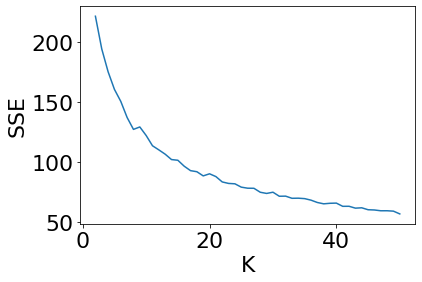

k =  2 SSE =  221.80190862721037 silhouette =  0.25828372966931046

k =  3 SSE =  194.58145368962226 silhouette =  0.18198681710539827

k =  4 SSE =  175.75998079484717 silhouette =  0.17129671993201454

k =  5 SSE =  159.15269333585056 silhouette =  0.1800025325584782

k =  6 SSE =  149.33201269626525 silhouette =  0.17947102468380807

k =  7 SSE =  137.31631158986542 silhouette =  0.17849974174236152

k =  8 SSE =  131.89520465519888 silhouette =  0.1729421385137801

k =  9 SSE =  126.6307111812185 silhouette =  0.16362745017499616

k =  10 SSE =  122.5125416657601 silhouette =  0.14102648395172288

k =  11 SSE =  114.2202321591929 silhouette =  0.17879136832776837

k =  12 SSE =  113.32835789149695 silhouette =  0.14162316928934265

k =  13 SSE =  108.18782133232463 silhouette =  0.14545442363487374

k =  14 SSE =  103.44734863848772 silhouette =  0.16218585273805042

k =  15 SSE =  101.60508692565251 silhouette =  0.14017167866126487

k =  16 SSE =  99.19148213056661 silhouette =  

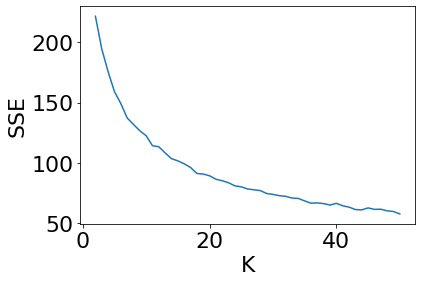

k =  2 SSE =  221.7679366867406 silhouette =  0.2578657109318056

k =  3 SSE =  194.99384366867028 silhouette =  0.19943057631043423

k =  4 SSE =  175.63090098387224 silhouette =  0.1741717444748452

k =  5 SSE =  164.7288407605409 silhouette =  0.17483212371980913

k =  6 SSE =  145.16040579369042 silhouette =  0.1831961942382613

k =  7 SSE =  137.19870862897022 silhouette =  0.17428086685513586

k =  8 SSE =  130.76265341844947 silhouette =  0.16659606199214141

k =  9 SSE =  127.3313516140164 silhouette =  0.17202431247772604

k =  10 SSE =  118.70542684111922 silhouette =  0.17985045588798504

k =  11 SSE =  113.85524993303017 silhouette =  0.1565636257191684

k =  12 SSE =  108.25056890493497 silhouette =  0.1615085847459751

k =  13 SSE =  106.24013561793375 silhouette =  0.15234853879863303

k =  14 SSE =  101.93622612839397 silhouette =  0.16369583967664253

k =  15 SSE =  97.37371914634952 silhouette =  0.16791223066324865

k =  16 SSE =  96.94229254240612 silhouette =  0.16

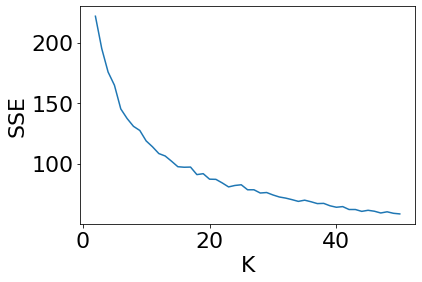

k =  2 SSE =  221.75732472448615 silhouette =  0.2572955826175513

k =  3 SSE =  195.1276655581425 silhouette =  0.18728754597875655

k =  4 SSE =  174.85529368994855 silhouette =  0.17296710791573083

k =  5 SSE =  157.85689478739232 silhouette =  0.18019500667244634

k =  6 SSE =  147.00856974434348 silhouette =  0.18148919483832143

k =  7 SSE =  139.82627697519288 silhouette =  0.16454169836847682

k =  8 SSE =  127.9494467203739 silhouette =  0.17824676132325448

k =  9 SSE =  126.39134825115997 silhouette =  0.15574205693595433

k =  10 SSE =  120.57908271289284 silhouette =  0.15631240093951146

k =  11 SSE =  112.4320465118819 silhouette =  0.1880443930555641

k =  12 SSE =  110.43575926083473 silhouette =  0.1642006996919838

k =  13 SSE =  105.70510120404751 silhouette =  0.15255586480871447

k =  14 SSE =  108.10833257346744 silhouette =  0.14059744268081548

k =  15 SSE =  98.19136374833957 silhouette =  0.161719386083046

k =  16 SSE =  97.47158507882924 silhouette =  0.14

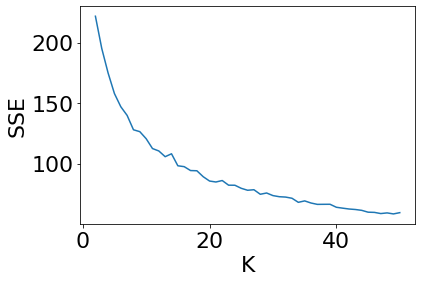

k =  2 SSE =  221.78887372209292 silhouette =  0.2570213676334644

k =  3 SSE =  195.07281299833198 silhouette =  0.18756630828628915

k =  4 SSE =  175.1959333496504 silhouette =  0.17457196332319042

k =  5 SSE =  160.02908277045458 silhouette =  0.17506131038671338

k =  6 SSE =  148.58217511280003 silhouette =  0.17491739353275096

k =  7 SSE =  140.9000825617135 silhouette =  0.17651913766647406

k =  8 SSE =  135.89588942868986 silhouette =  0.15703698072737082

k =  9 SSE =  125.79045011388246 silhouette =  0.17168635771274968

k =  10 SSE =  119.18680582217019 silhouette =  0.170595304943418

k =  11 SSE =  113.35899423622944 silhouette =  0.1594232565359069

k =  12 SSE =  110.46272157699426 silhouette =  0.14804140095913648

k =  13 SSE =  107.61759229788466 silhouette =  0.1669263587915766

k =  14 SSE =  103.2376007170372 silhouette =  0.15422756882807995

k =  15 SSE =  98.95893238894325 silhouette =  0.16003481499656377

k =  16 SSE =  95.82260243596926 silhouette =  0.16

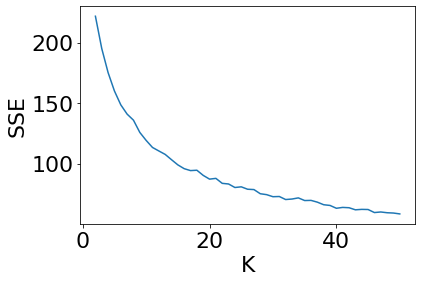

k =  2 SSE =  221.76348083372727 silhouette =  0.2577115109984599

k =  3 SSE =  194.66321195397506 silhouette =  0.1852376828135174

k =  4 SSE =  174.71683065599757 silhouette =  0.18069423314597613

k =  5 SSE =  158.0725064245693 silhouette =  0.17914304951527915

k =  6 SSE =  151.78416052086604 silhouette =  0.17557110996946856

k =  7 SSE =  144.77312317381893 silhouette =  0.13588626323868389

k =  8 SSE =  132.9544231309669 silhouette =  0.17237495821704288

k =  9 SSE =  121.66047879363302 silhouette =  0.17751497693587534

k =  10 SSE =  119.91842331425534 silhouette =  0.14791026008660485

k =  11 SSE =  115.42708562053284 silhouette =  0.17108887090202493

k =  12 SSE =  111.10269790508178 silhouette =  0.14445152979364664

k =  13 SSE =  106.05002807259247 silhouette =  0.15471113834288655

k =  14 SSE =  102.32899107253793 silhouette =  0.16485059661717488

k =  15 SSE =  99.13280993010218 silhouette =  0.1630479422780017

k =  16 SSE =  97.49470619360838 silhouette =  0

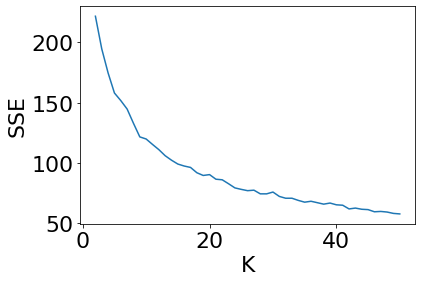

In [12]:
for i in range(0, 50):
    sse_list = list()
    max_k = 50
    for k in range(2, max_k + 1):
        kmeans = MiniBatchKMeans(n_clusters = k, init = 'k-means++', max_iter = 1000, 
                                          max_no_improvement = 100, n_init = 10, reassignment_ratio = 0.1)
        
        kmeans.fit(train_data)
        sse = kmeans.inertia_
        sse_list.append(sse)

        print("k = ", k, "SSE = ", sse, "silhouette = ", silhouette_score(train_data, kmeans.labels_))
        print()
        
    plt.plot(range(2, len(sse_list) + 2), sse_list)
    plt.ylabel('SSE', fontsize=22)
    plt.xlabel('K', fontsize=22)
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.show()

In [13]:
kmeans = MiniBatchKMeans(n_clusters = 6, init = 'k-means++', max_iter = 1000, 
                                          max_no_improvement = 100, n_init = 10, reassignment_ratio = 0.1)
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print ('centers', kmeans.cluster_centers_)
print()
print ('labels', dict(zip(bins, hist)))
print ('sse', kmeans.inertia_)
print ('silhouette', silhouette_score(train_data, kmeans.labels_))

centers [[0.53377514 0.14465162 0.43595859 0.47926946 0.51284179 0.13830626]
 [0.5558605  0.78163299 0.30711314 0.35163253 0.46444187 0.29916777]
 [0.44467722 0.14144501 0.57389583 0.1605013  0.2395582  0.1585878 ]
 [0.48352581 0.13908339 0.35621924 0.20427091 0.36807766 0.56378634]
 [0.36413153 0.73734645 0.4324024  0.14345738 0.18657113 0.21939689]
 [0.36468331 0.16242249 0.17486952 0.1346692  0.23602433 0.14900124]]

labels {0: 130, 1: 88, 2: 160, 3: 147, 4: 119, 5: 239}
sse 155.25193847360137
silhouette 0.15146150946883244


In [14]:
diz_kmeans_5 = {int(i): np.where(kmeans.labels_ == int(i))[0].tolist() for i in range(kmeans.n_clusters)}
diz_kmeans_5['labels'] = {int(a): int(b) for a, b in zip(bins, hist)}
diz_kmeans_5['centers'] = [i.tolist() for i in kmeans.cluster_centers_]
diz_kmeans_5['sse'] = float(kmeans.inertia_)
diz_kmeans_5['silhouette'] = float(silhouette_score(train_data, kmeans.labels_))

In [15]:
with open('diz_kmeans_5.json', 'w') as fp:
    json.dump(diz_kmeans_5, fp, indent=4)

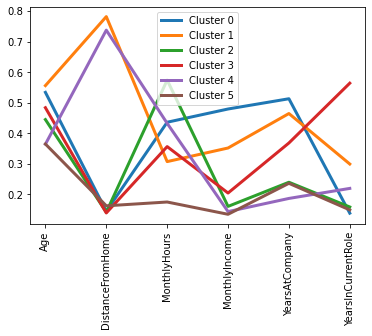

In [16]:
for i in range(0, 6):
    plt.plot(range(0, 6), kmeans.cluster_centers_[i], label='Cluster %s' % i, linewidth=3)
    
plt.xticks(range(0, 6), list(df_copy.columns), rotation = 90)
plt.legend()
plt.show()

In [17]:
df_clusters_5 = df_copy.copy()

In [18]:
df_clusters_5['Labels'] = kmeans.labels_

In [19]:
df_clusters_5

,Age,DistanceFromHome,MonthlyHours,MonthlyIncome,YearsAtCompany,YearsInCurrentRole,Labels
0,0.809524,0.285714,0.231122,0.286171,0.40,0.4375,3
1,0.428571,0.000000,0.233476,0.147183,0.05,0.5000,3
2,0.166667,0.535714,0.747017,0.144644,0.05,0.3125,4
3,0.357143,0.142857,0.435214,0.068878,0.15,0.4375,3
4,0.309524,0.285714,0.142192,0.204325,0.50,0.1250,5
...,...,...,...,...,...,...,...
878,0.476190,0.392857,0.453907,0.166769,0.50,0.0000,2
879,0.452381,0.535714,0.088947,0.042558,0.85,0.0000,1
880,0.357143,0.178571,0.436931,0.159227,0.55,0.4375,3
881,0.357143,0.107143,0.323273,0.057373,0.15,0.1250,5


In [20]:
df_clusters_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 883 non-null    float64
 1   DistanceFromHome    883 non-null    float64
 2   MonthlyHours        883 non-null    float64
 3   MonthlyIncome       883 non-null    float64
 4   YearsAtCompany      883 non-null    float64
 5   YearsInCurrentRole  883 non-null    float64
 6   Labels              883 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 45.0 KB


In [21]:
np.unique(df_clusters_5['Labels'])

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [22]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([130,  88, 160, 147, 119, 239]))

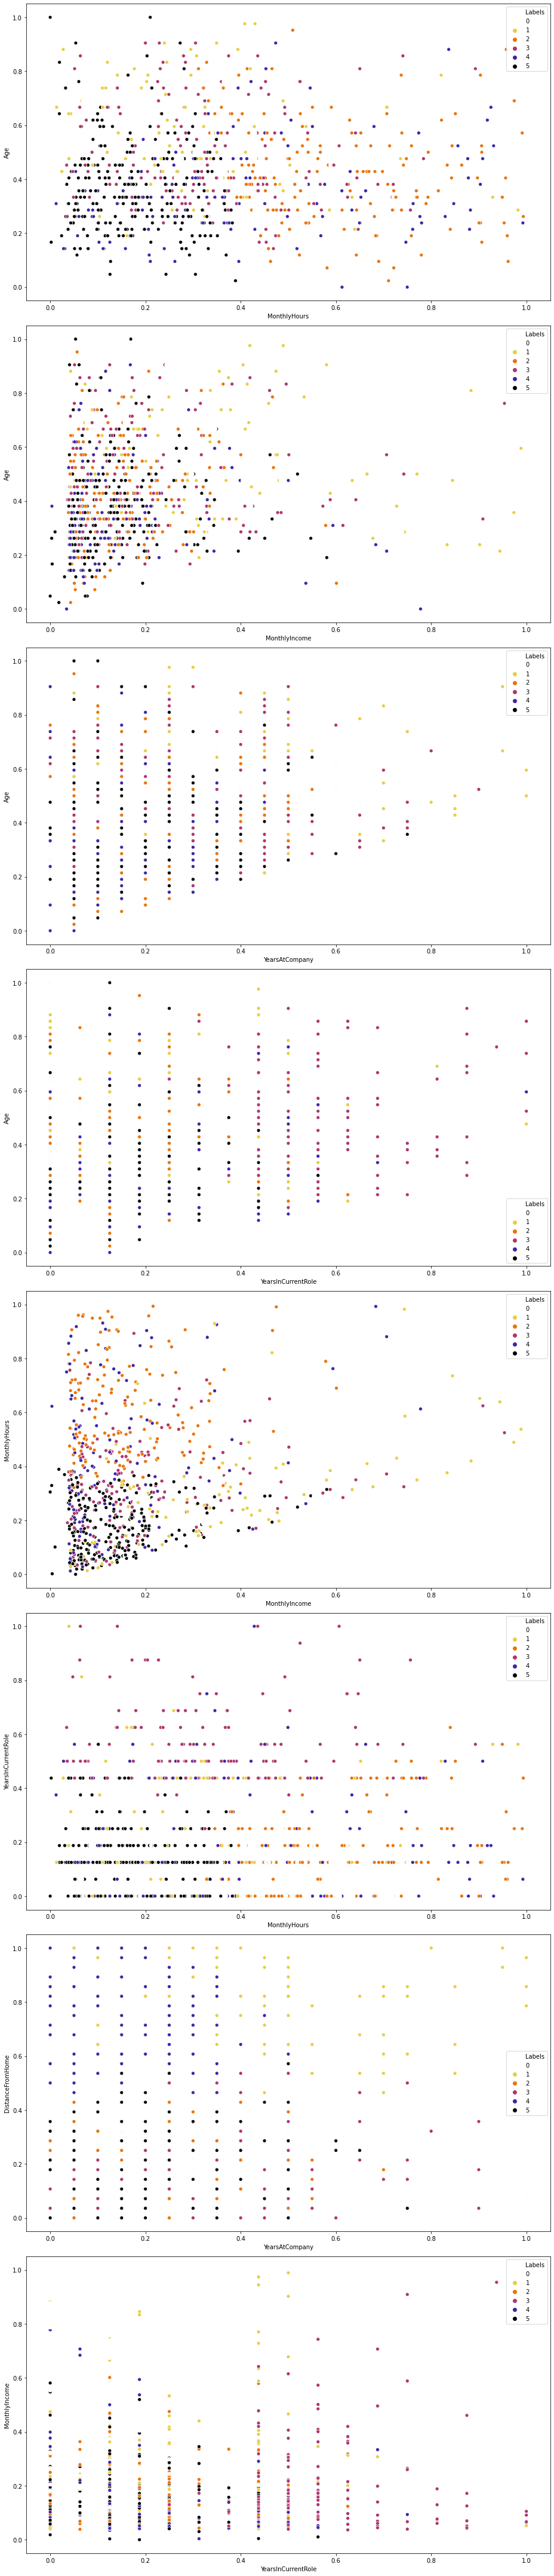

In [23]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, 1, figsize = (13,60))

sns.scatterplot(x = 'MonthlyHours', y = 'Age', data = df_clusters_5, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax1)

sns.scatterplot(x = 'MonthlyIncome', y = 'Age', data = df_clusters_5, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax2)

sns.scatterplot(x = 'YearsAtCompany', y = 'Age', data = df_clusters_5, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax3)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'Age', data = df_clusters_5, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax4)

sns.scatterplot(x = 'MonthlyIncome', y = 'MonthlyHours', data = df_clusters_5, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax5)

sns.scatterplot(x = 'MonthlyHours', y = 'YearsInCurrentRole', data = df_clusters_5, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax6)

sns.scatterplot(x = 'YearsAtCompany', y = 'DistanceFromHome', data = df_clusters_5, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax7)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'MonthlyIncome', data = df_clusters_5, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax8)


plt.tight_layout()
plt.show()

<h3>Non normalized dataset for centroid conversion</h3>

In [24]:
scaler = MinMaxScaler()

In [25]:
df_NON_normalized = pd.read_csv("Numerical_NON_NORMALIZED_Train_HR_Employee_Attrition.csv")

In [26]:
df_NON_normalized_reduct = pd.DataFrame()

col_to_add = ['Age', 'DistanceFromHome', 'MonthlyHours', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole']

for element in col_to_add:
    df_NON_normalized_reduct[element] = df_NON_normalized[element]
    
df_NON_normalized_reduct

,Age,DistanceFromHome,MonthlyHours,MonthlyIncome,YearsAtCompany,YearsInCurrentRole
0,52,9,156.61,8446,8,7
1,36,1,157.94,4834,1,8
2,25,16,448.06,4768,1,5
3,33,5,271.91,2799,3,7
4,31,9,106.37,6319,10,2
...,...,...,...,...,...,...
878,38,12,282.47,5343,10,0
879,37,16,76.29,2115,17,0
880,33,6,272.88,5147,11,7
881,33,4,208.67,2500,3,2


In [27]:
X = scaler.fit_transform(df_NON_normalized_reduct.values)

In [36]:
X

array([[0.80952381, 0.28571429, 0.23112189, 0.28617054, 0.4       ,
        0.4375    ],
       [0.42857143, 0.        , 0.23347612, 0.14718332, 0.05      ,
        0.5       ],
       [0.16666667, 0.53571429, 0.74701738, 0.14464368, 0.05      ,
        0.3125    ],
       ...,
       [0.35714286, 0.17857143, 0.43693136, 0.15922734, 0.55      ,
        0.4375    ],
       [0.35714286, 0.10714286, 0.32327327, 0.05737263, 0.15      ,
        0.125     ],
       [0.64285714, 0.07142857, 0.32514957, 0.12990611, 0.5       ,
        0.25      ]])

In [28]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

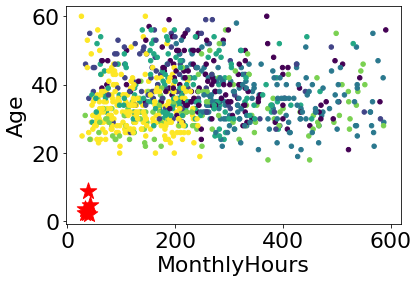

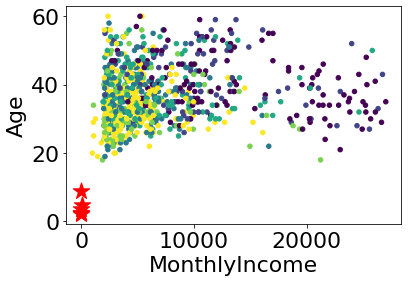

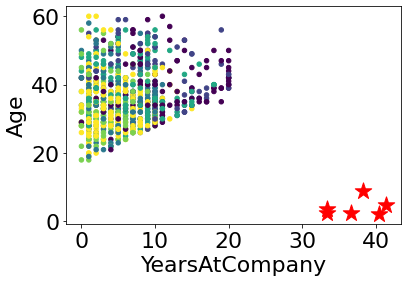

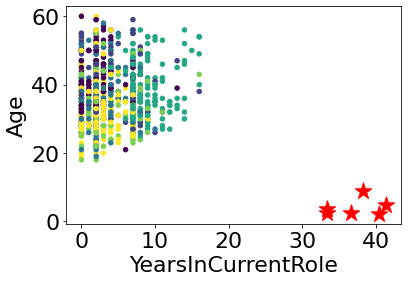

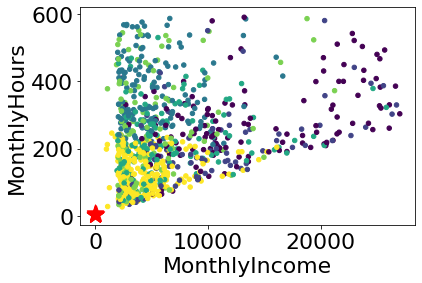

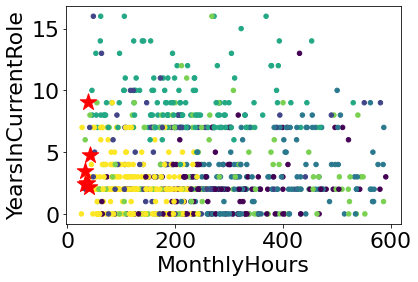

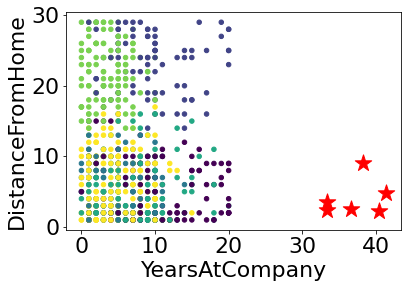

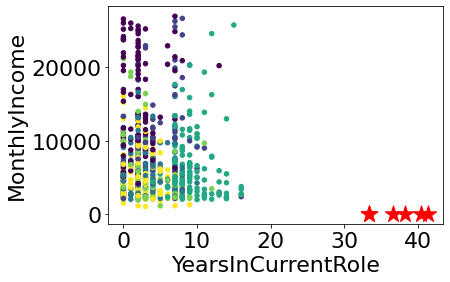

In [29]:
features_to_plot = [('MonthlyHours', 'Age'), ('MonthlyIncome', 'Age'),('YearsAtCompany', 'Age'), 
                    ('YearsInCurrentRole', 'Age'), ('MonthlyIncome', 'MonthlyHours'), 
                    ('MonthlyHours', 'YearsInCurrentRole'), ('YearsAtCompany', 'DistanceFromHome'),
                    ('YearsInCurrentRole', 'MonthlyIncome')]

for a, b in features_to_plot:
    plt.scatter(df_NON_normalized_reduct[a], df_NON_normalized_reduct[b], c=kmeans.labels_, s=20)
    plt.scatter(centers[:, 0], centers[:, 5], s=300, marker='*', c='r')
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.xlabel(a, fontsize=22)
    plt.ylabel(b, fontsize=22)
    plt.show()

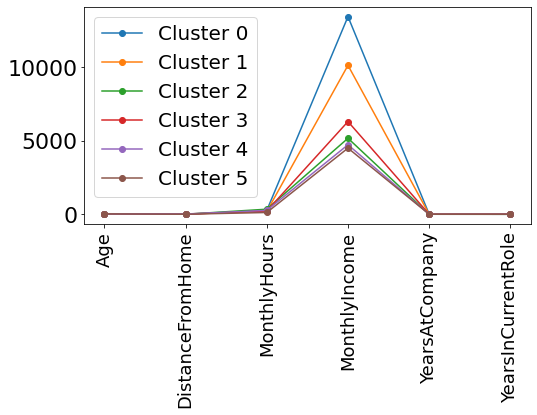

In [30]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
    
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df_copy.columns)), df_copy.columns, fontsize=18, rotation = 90)
plt.legend(fontsize=20)
plt.show()

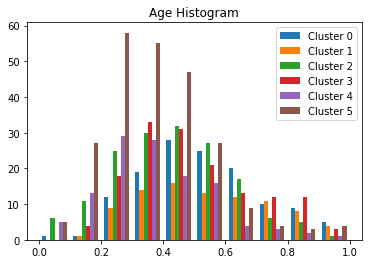

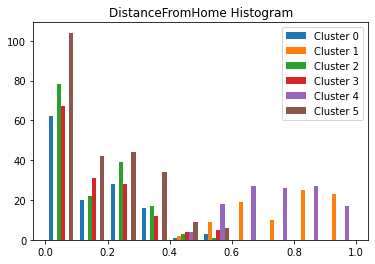

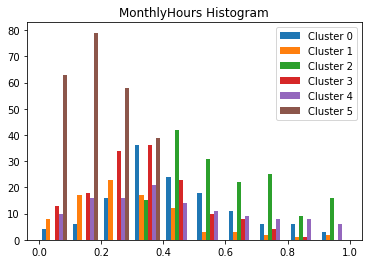

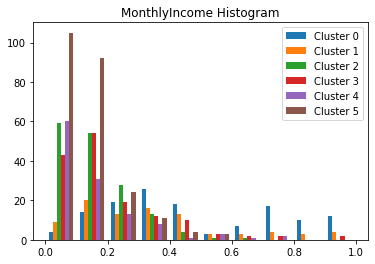

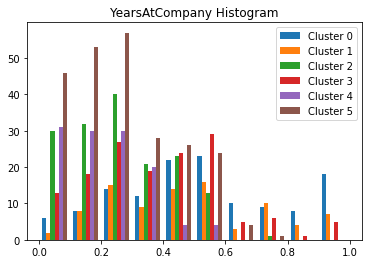

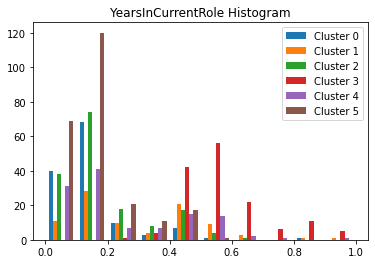

In [32]:
for column in df_copy.columns:
    
    cluster_list = []
    list_num_cluster = []
    
    for num_cluster in np.unique(df_clusters_5['Labels']):
        cluster_list.append(df_clusters_5[df_clusters_5['Labels'] == num_cluster][column])  #distribution
        list_num_cluster.append('Cluster %s' % num_cluster)                                 #num cluster
           
    plt.hist(cluster_list, label = list_num_cluster)
    plt.legend(loc='upper right')
    plt.title(column + " Histogram")               
    plt.show()

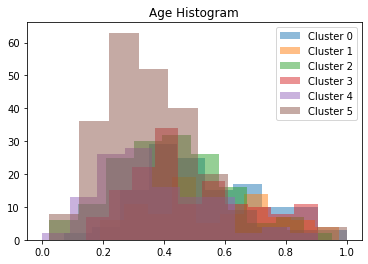

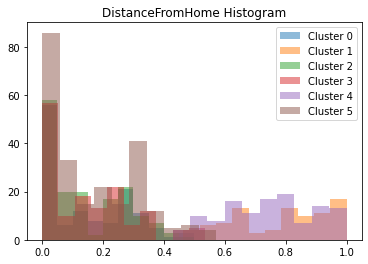

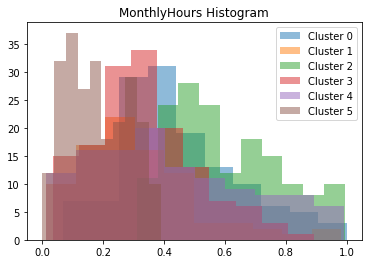

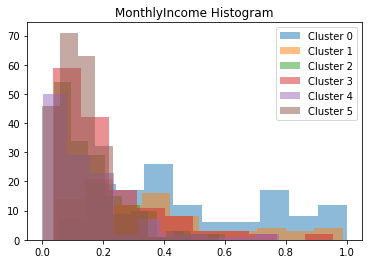

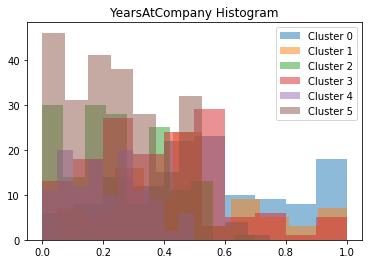

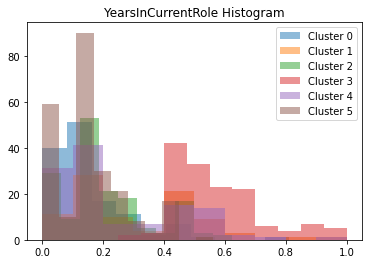

In [33]:
for column in df_copy.columns:
    
    for num_cluster in np.unique(df_clusters_5['Labels']):
        plt.hist(df_clusters_5[df_clusters_5['Labels'] == num_cluster][column], 
                 alpha = 0.5, label = 'Cluster %s' % num_cluster)       
    
    plt.legend(loc='upper right')
    plt.title(column + " Histogram")               
    plt.show()

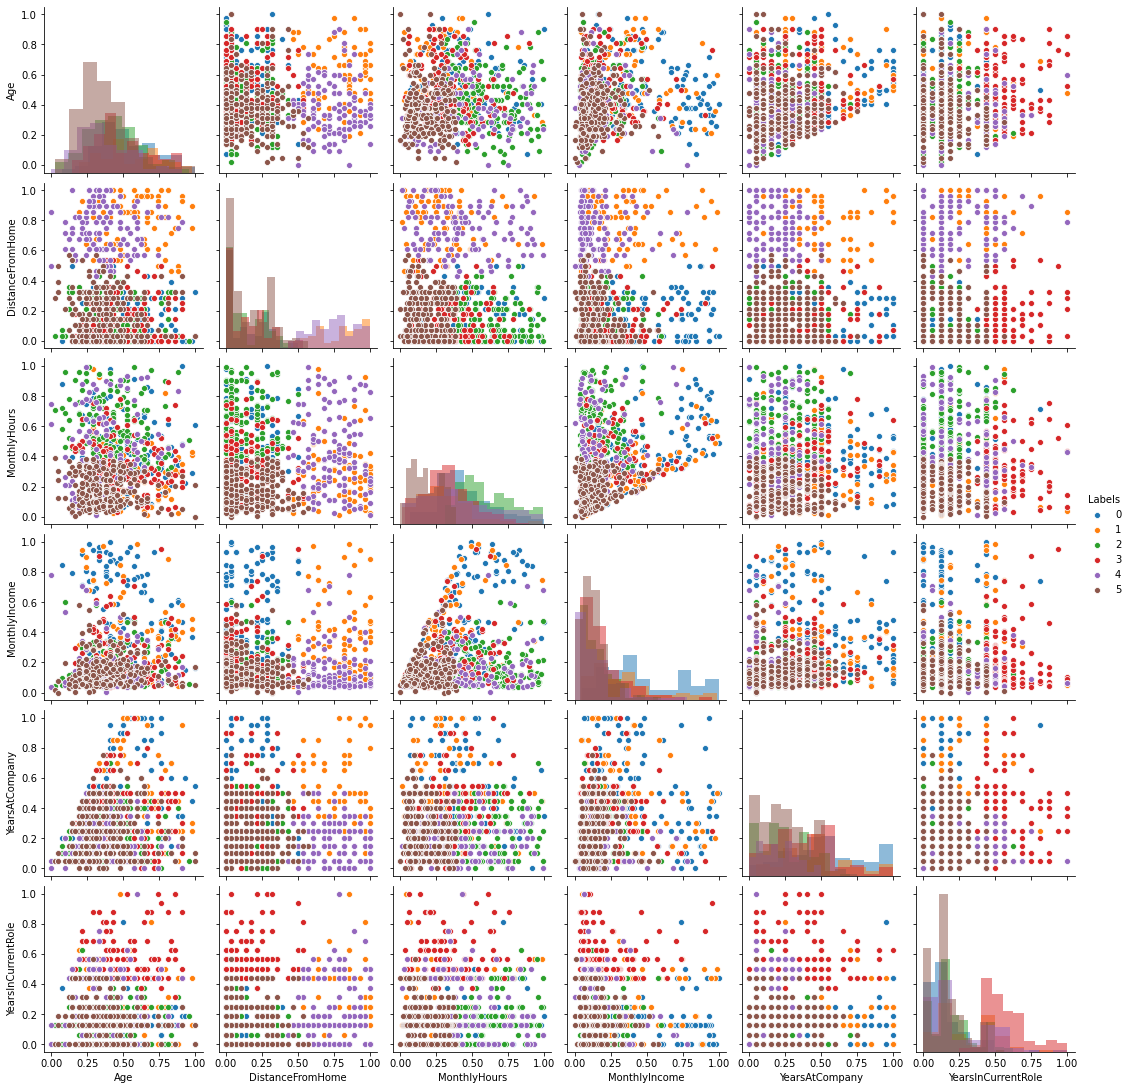

In [34]:
sns.pairplot(df_clusters_5, hue="Labels", diag_kws={'alpha':0.5}, diag_kind="hist")